<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/main/pcvplanner_ver5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Post Covid_19 Vacation Planner



## Your gateway to safe travel 

In [1]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [2]:
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import pandas as pd

# Data Collection : Source - https://covid.ourworldindata.org/

In [3]:
import pandas as pd

#load dataset
pcv= pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Shape of data',pcv.shape)
pcv.head()
pcv

Shape of data (94158, 59)


iso_code continent  ... life_expectancy human_development_index
0          AFG      Asia  ...           64.83                   0.511
1          AFG      Asia  ...           64.83                   0.511
2          AFG      Asia  ...           64.83                   0.511
3          AFG      Asia  ...           64.83                   0.511
4          AFG      Asia  ...           64.83                   0.511
...        ...       ...  ...             ...                     ...
94153      ZWE    Africa  ...           61.49                   0.571
94154      ZWE    Africa  ...           61.49                   0.571
94155      ZWE    Africa  ...           61.49                   0.571
94156      ZWE    Africa  ...           61.49                   0.571
94157      ZWE    Africa  ...           61.49                   0.571

[94158 rows x 59 columns]

In [4]:
pd.options.display.max_seq_items = 230

# ARIMA Model process & Dependencies 

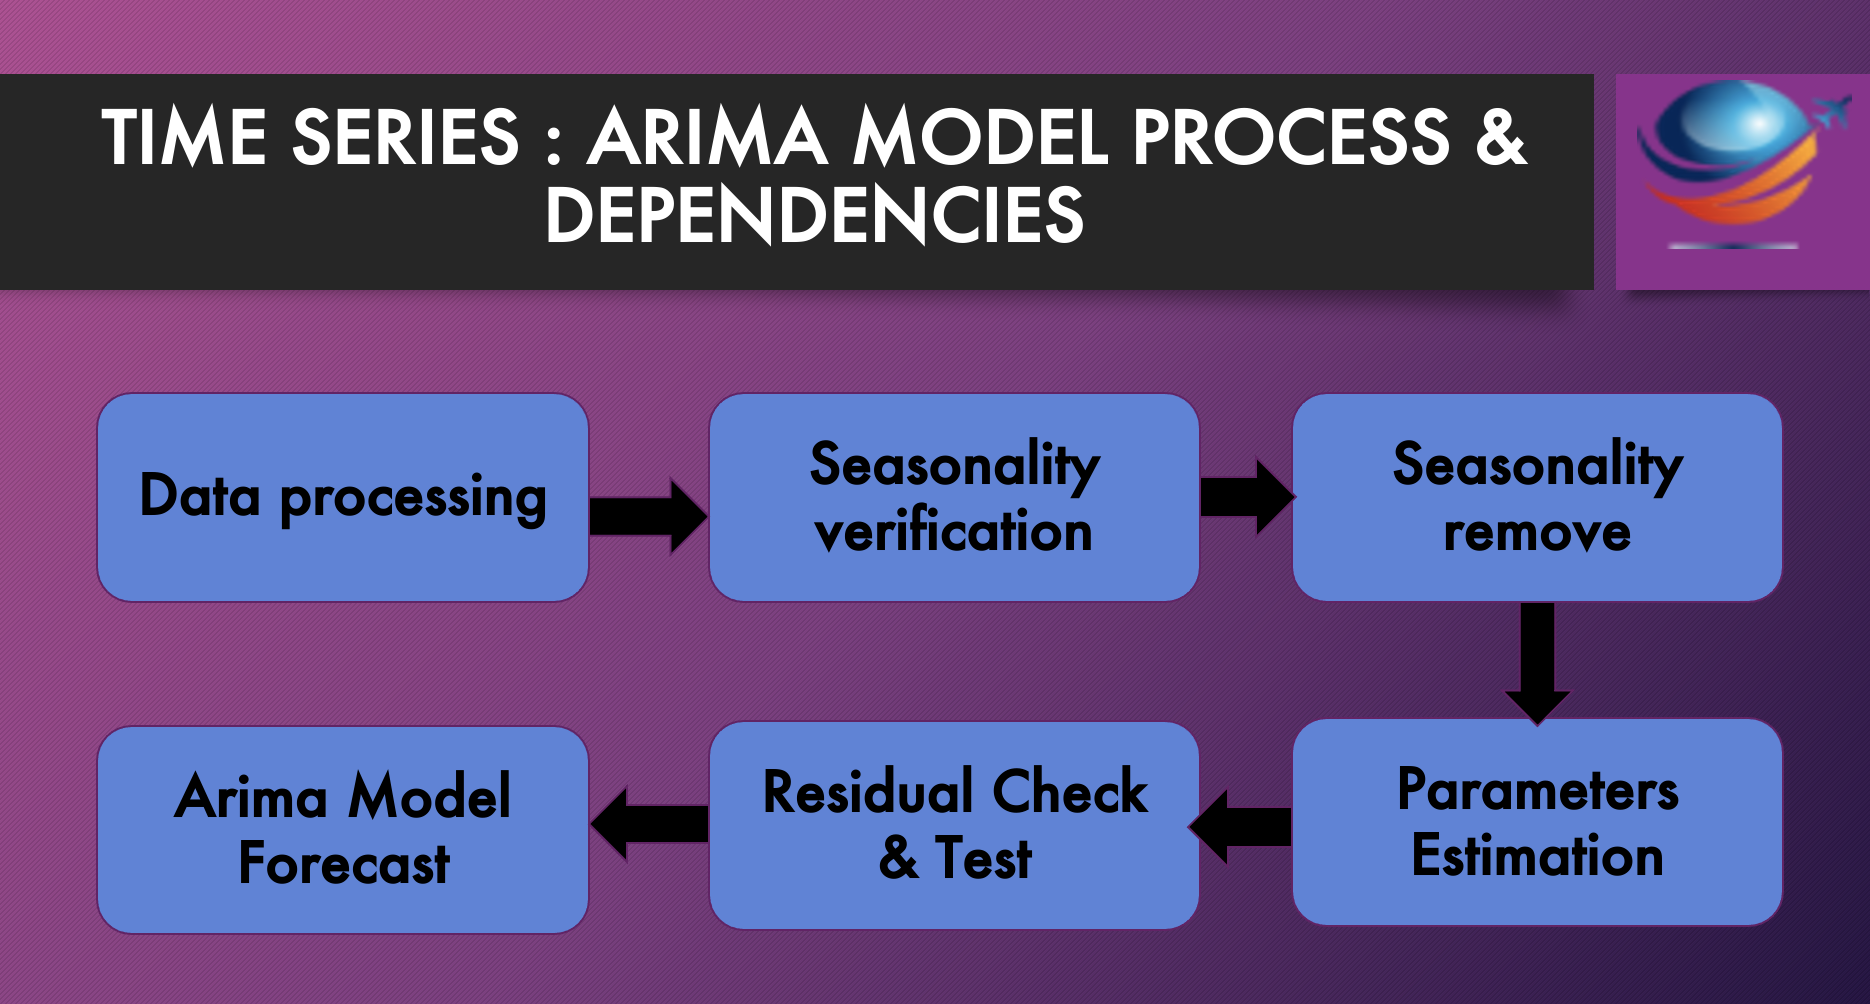

In [5]:
!pip install pmdarima 

     |████████████████████████████████| 1.5MB 7.3MB/s 
     |████████████████████████████████| 9.5MB 48.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Import Dependencies 

In [6]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Best Model chosen is : ARIMA (p,d,q) = ARIMA(4,4,2) & Plots

# Adding Lag to stabilize different gaps between two doses

## Two order differencing for making Timeseries stationary

## Creating master data set : world_data_forecast.csv

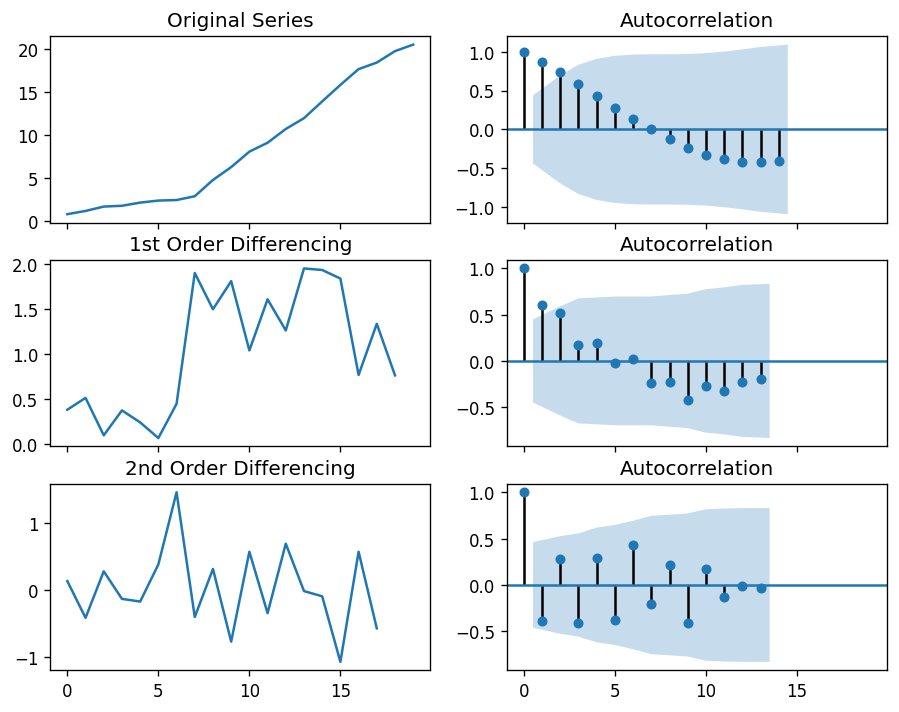

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=32.618, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=35.820, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=34.849, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=35.357, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=33.844, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=34.597, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=34.580, Time=0.16 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=37.335, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36.353, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=30.661, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=33.510, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=32.947, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=32.635, Time=0.10 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=32.617, Time=0.10 sec


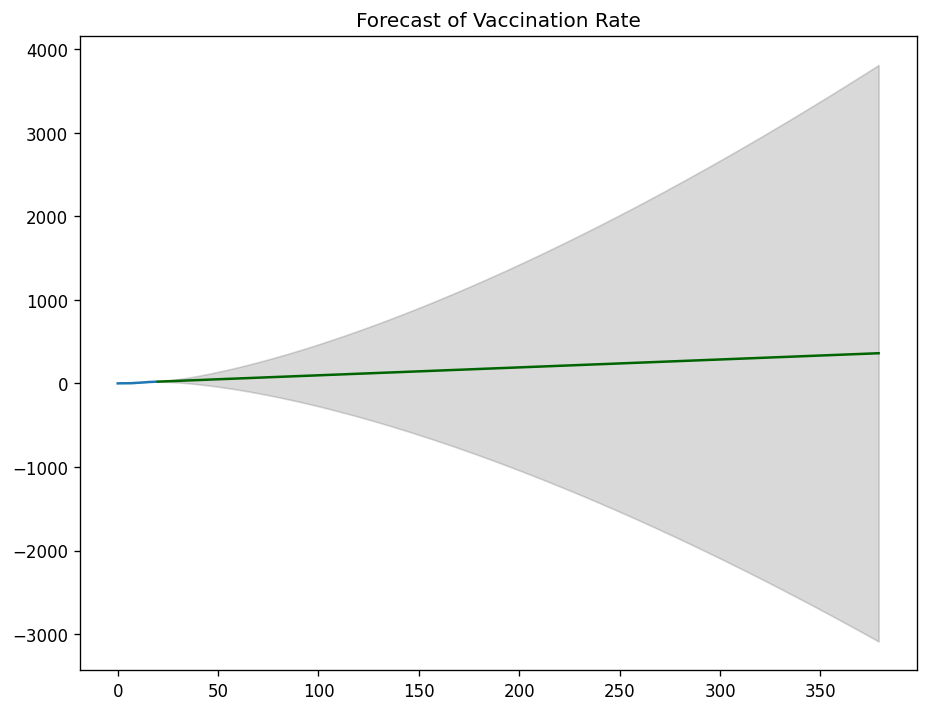

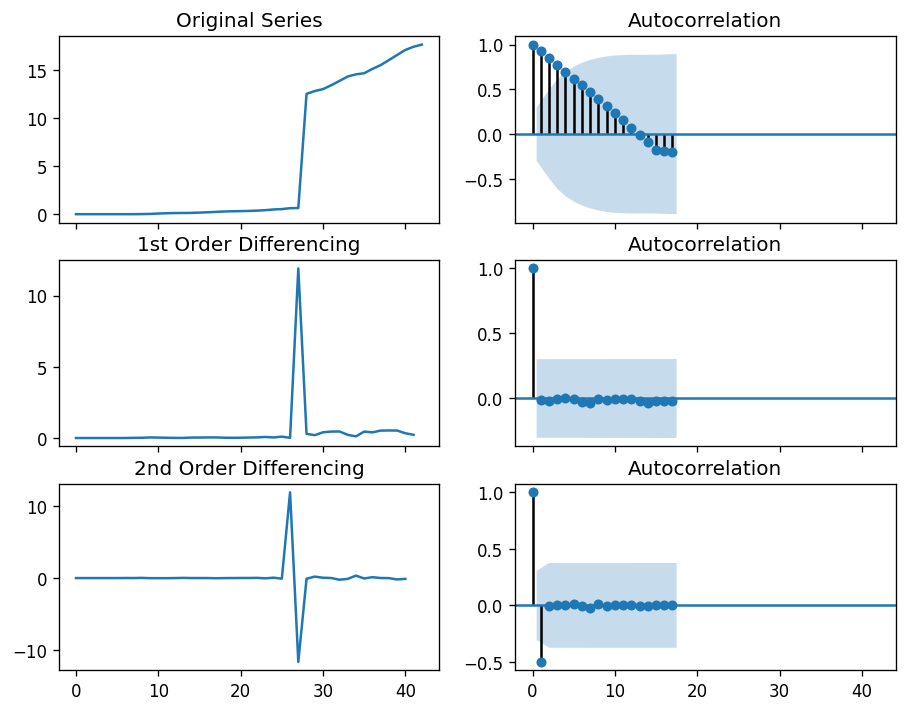

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=198.577, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=189.112, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=196.578, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=186.286, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=185.628, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=186.034, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=183.633, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=184.288, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=184.042, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=179.314, Time=0.08 sec
 A

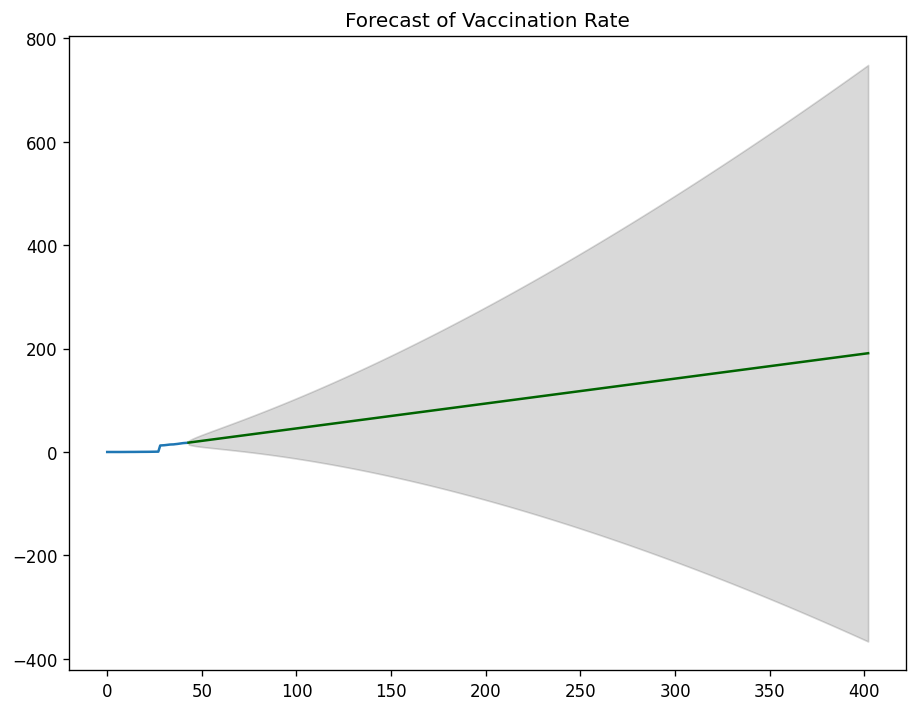

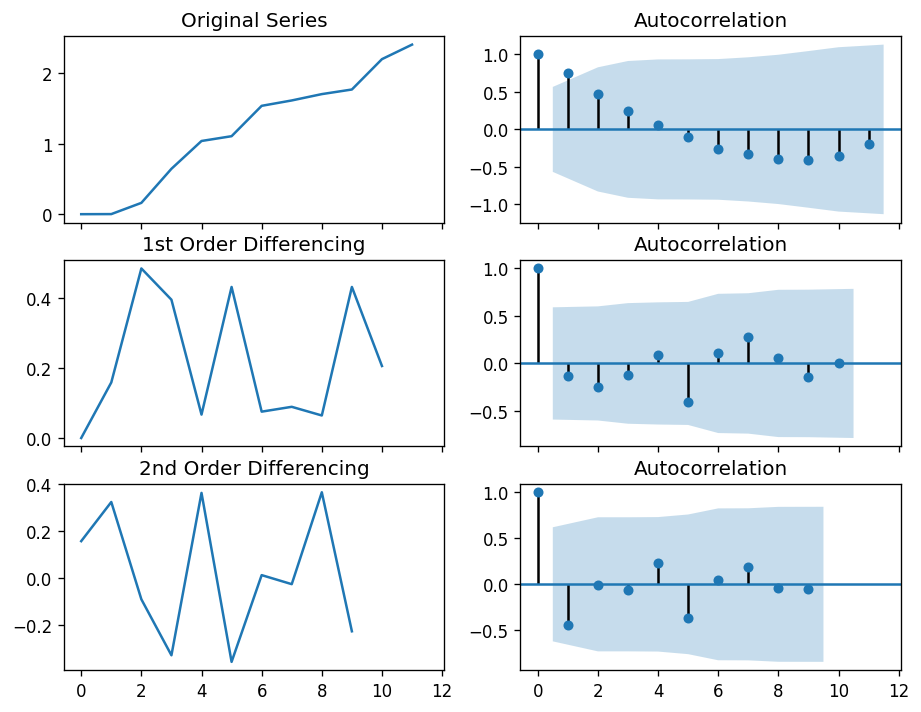

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5.566, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5.380, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3.627, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.333 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -0.814
Date:                Tue, 08 Jun 2021   AIC                              3.627
Time:                        14:53:36   BIC                              3.930
Sample:                             0   HQIC                             3.295
                                 - 12                                         
Covariance Type:

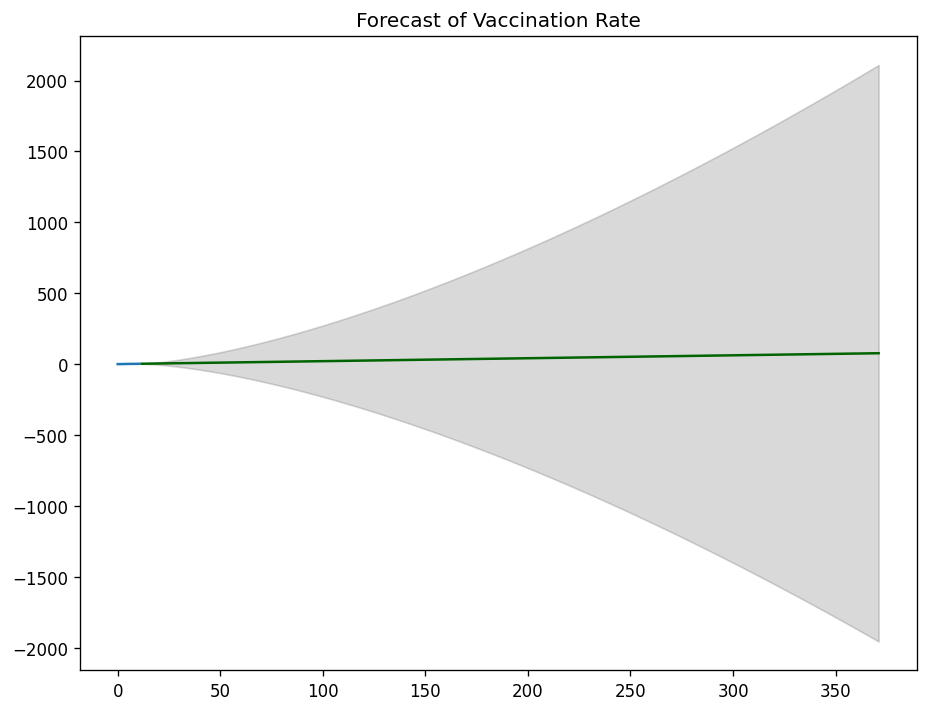

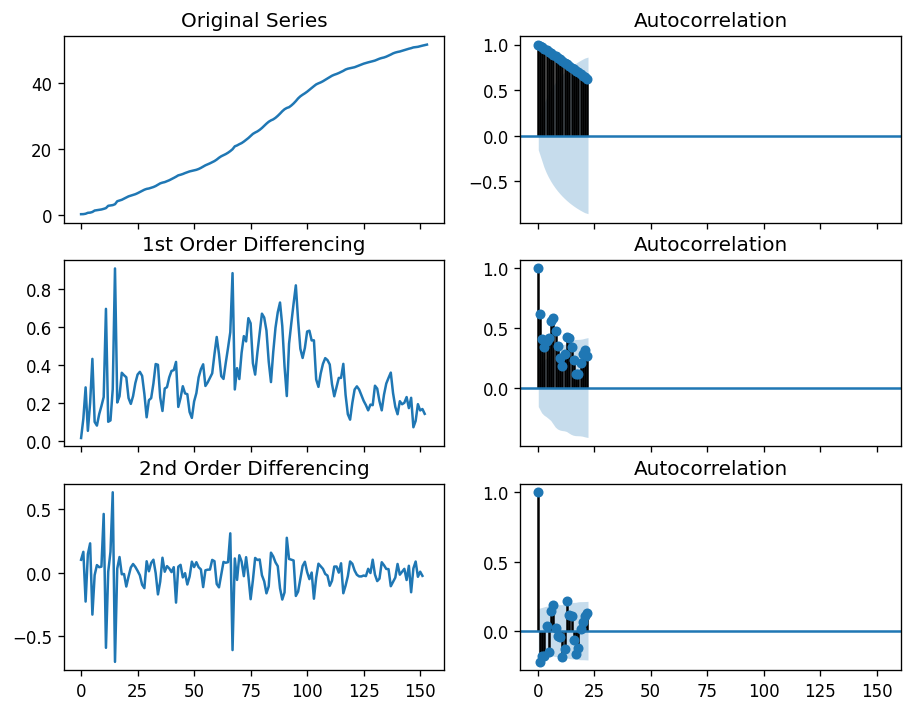

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-187.642, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-148.624, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-154.206, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-178.726, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-150.619, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-188.209, Time=0.31 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-190.135, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-188.378, Time=0.31 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-189.689, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-192.135, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-180.726, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-190.209, Time=0.14 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-190.377, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

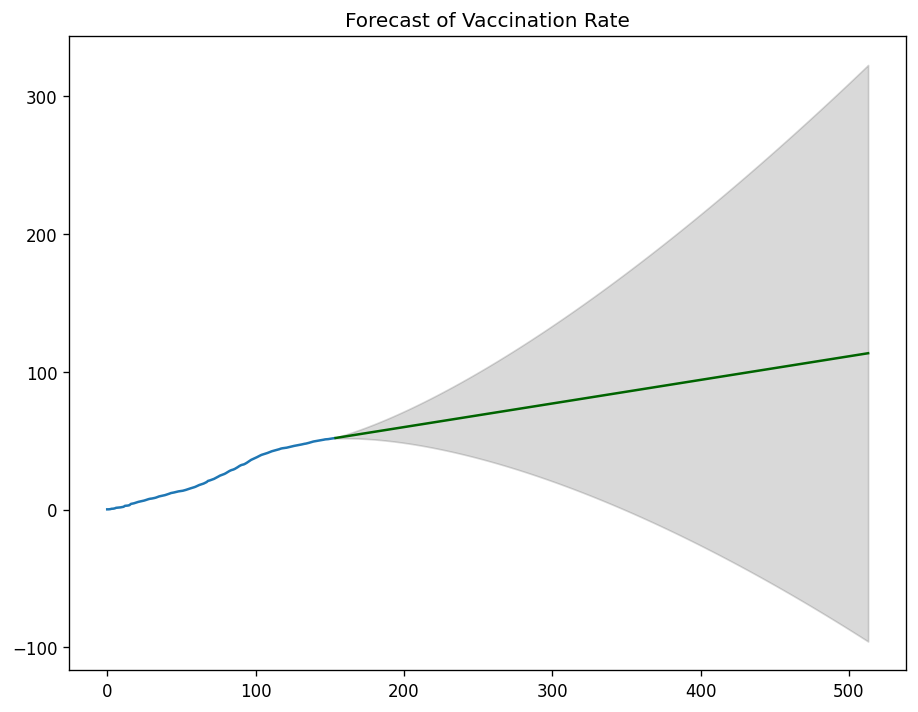

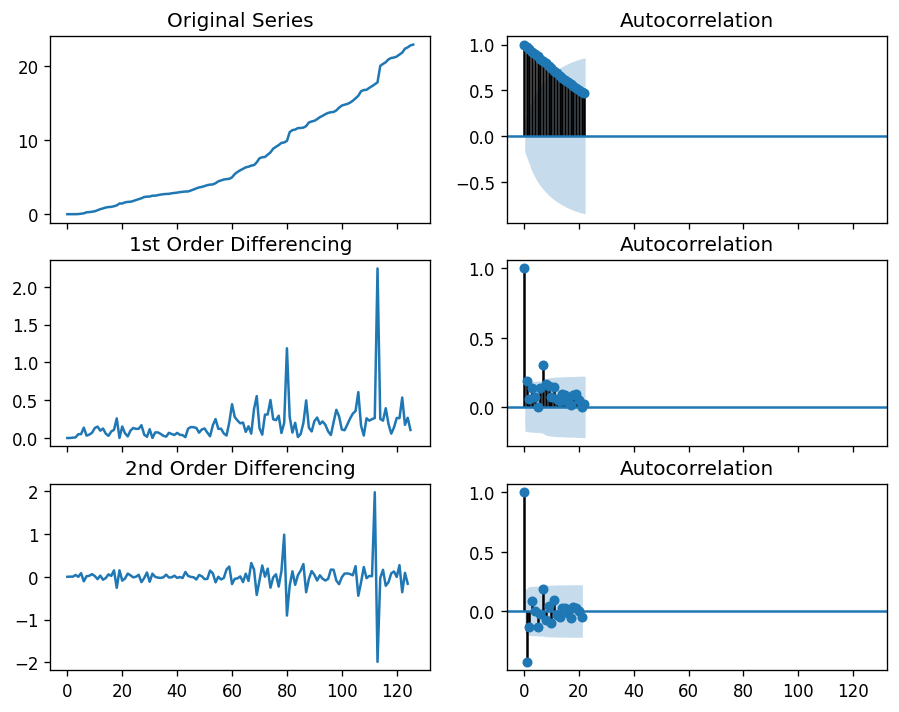

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3.795, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2.811, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=0.328, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=0.517, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=57.844, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2.194, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1.198, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2.479, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2.238, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3.802, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=36.757, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=26.394, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-2.205, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2.298, Time=0.15 sec
 ARIM

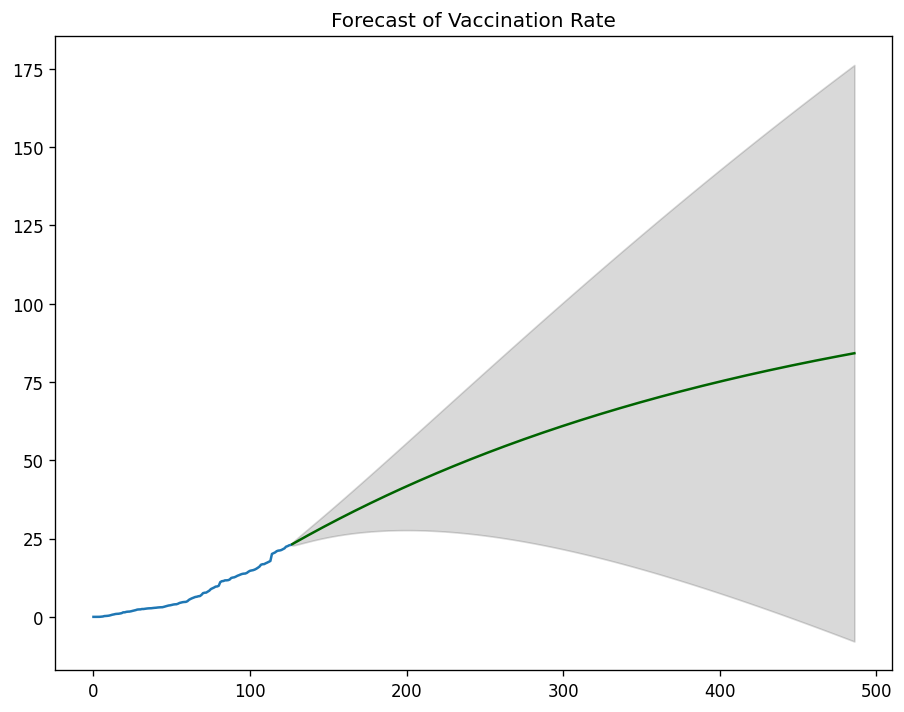

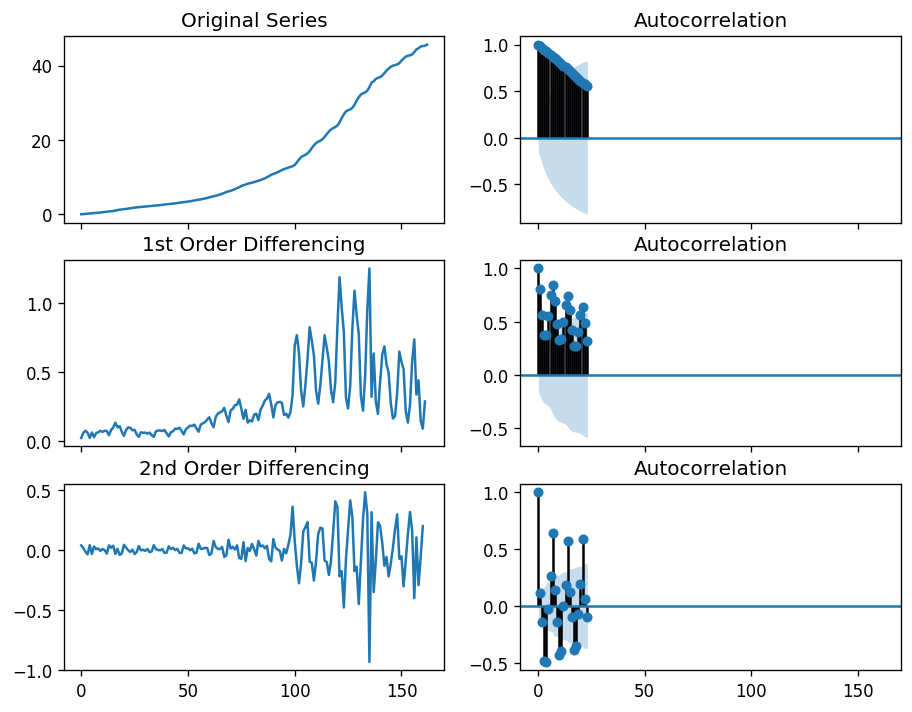

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-123.719, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-124.856, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-125.155, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-125.674, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-126.839, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.466 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  64.420
Date:                Tue, 08 Jun 2021   AIC                           -126.839
Time:                        14:53:47   BIC                           -123.758
Sample:                             0   HQIC                          -125.588
                                - 163                                       

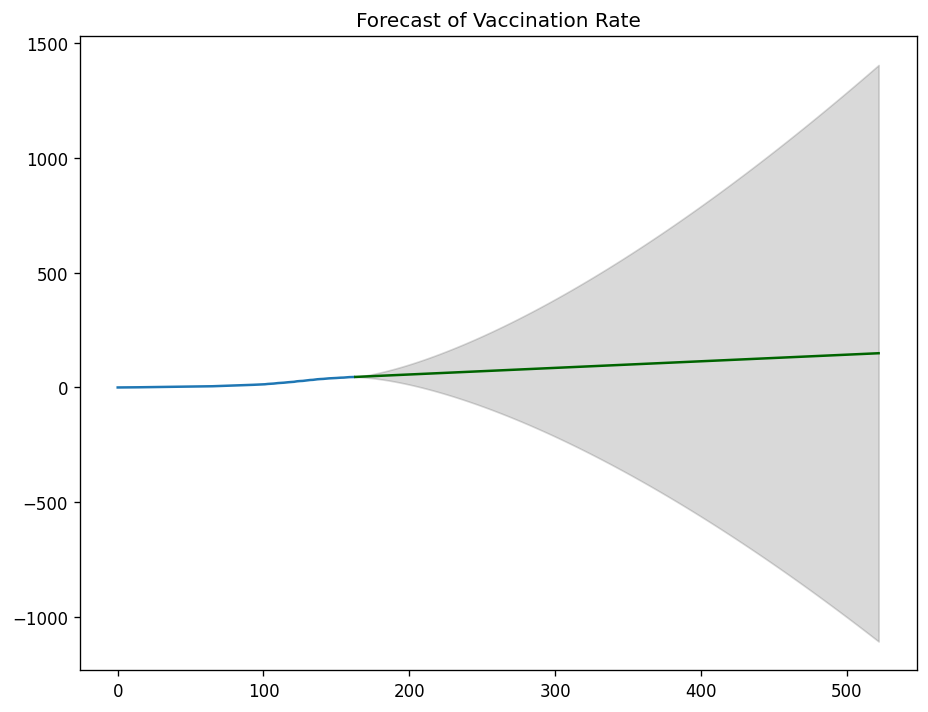

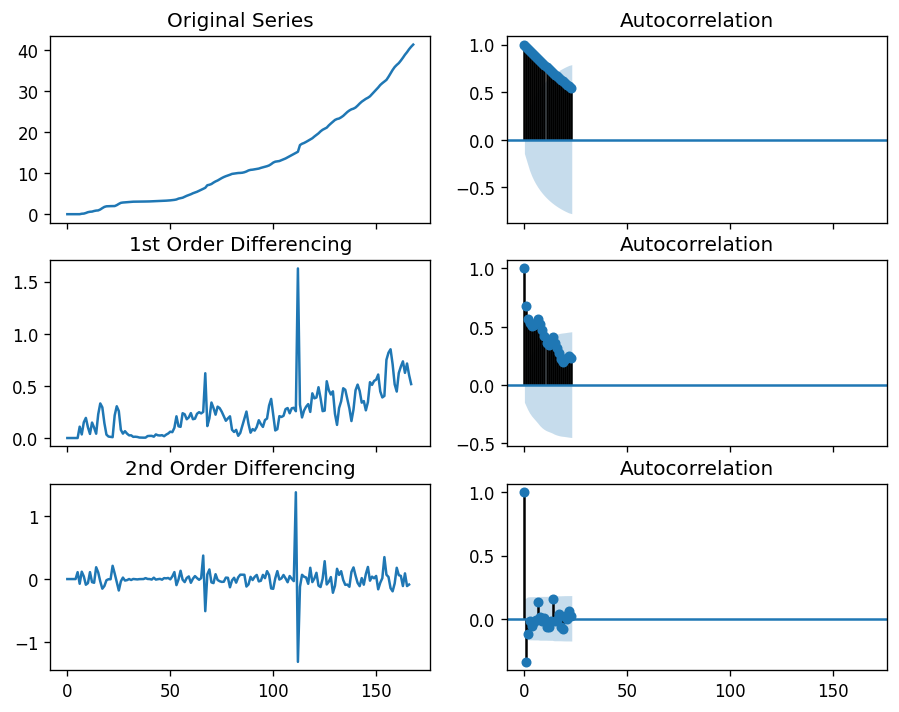

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-158.173, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-101.383, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-119.869, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-153.999, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-103.332, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-156.964, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-156.697, Time=0.37 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-158.696, Time=0.19 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-156.502, Time=0.44 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-157.274, Time=0.55 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-157.838, Time=0.08 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 2.376 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  

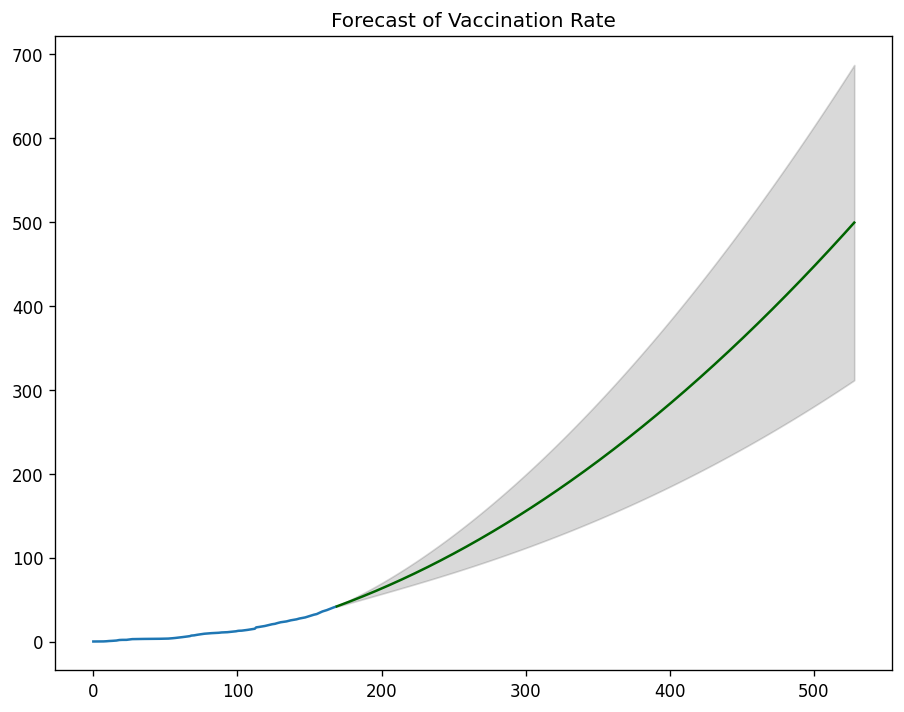

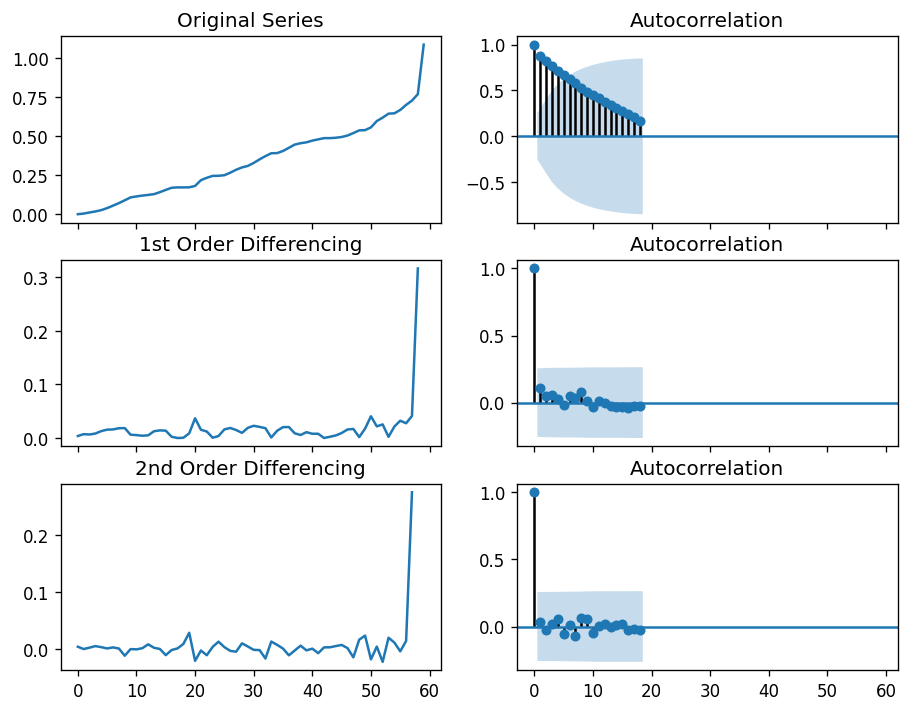

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-210.476, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-213.555, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-212.198, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-212.462, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-214.341, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.511 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 108.171
Date:                Tue, 08 Jun 2021   AIC                           -214.341
Time:                        14:53:53   BIC                           -212.281
Sample:                             0   HQIC                          -213.539
                                 - 60                                       

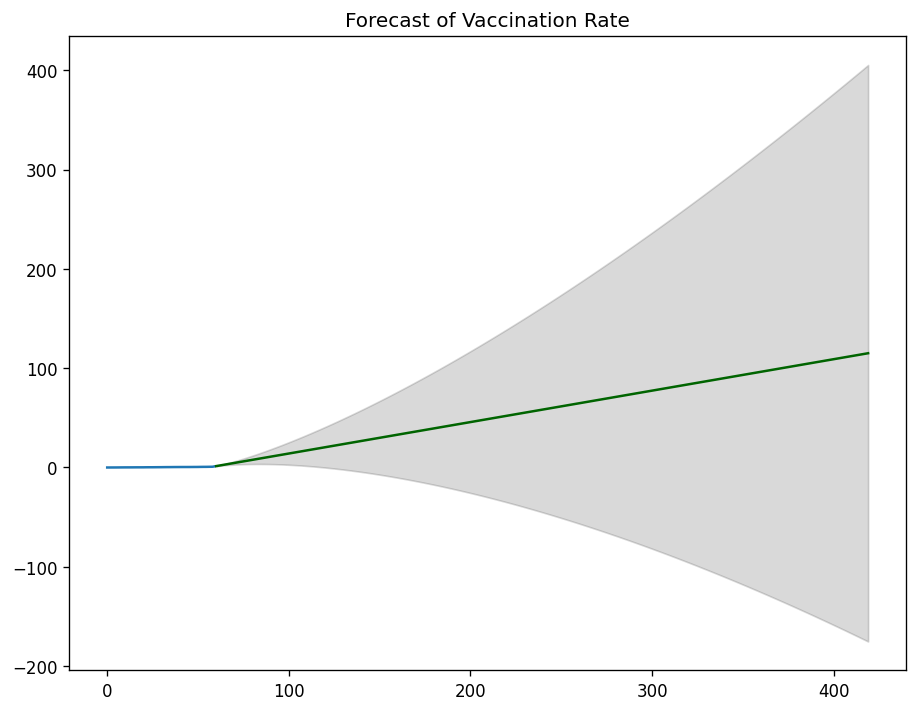

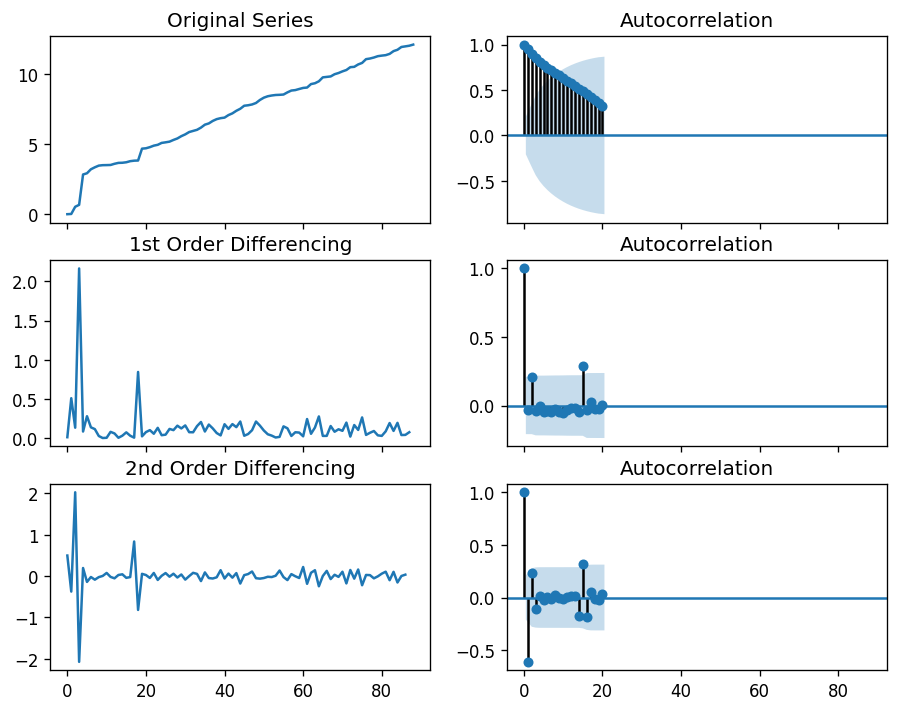

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7.989, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5.747, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7.641, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7.672, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27.917, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.389 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   89
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  -0.874
Date:                Tue, 08 Jun 2021   AIC                              5.747
Time:                        14:53:55   BIC                             10.702
Sample:                             0   HQIC                             7.743
                                 - 89                                         
Covariance 

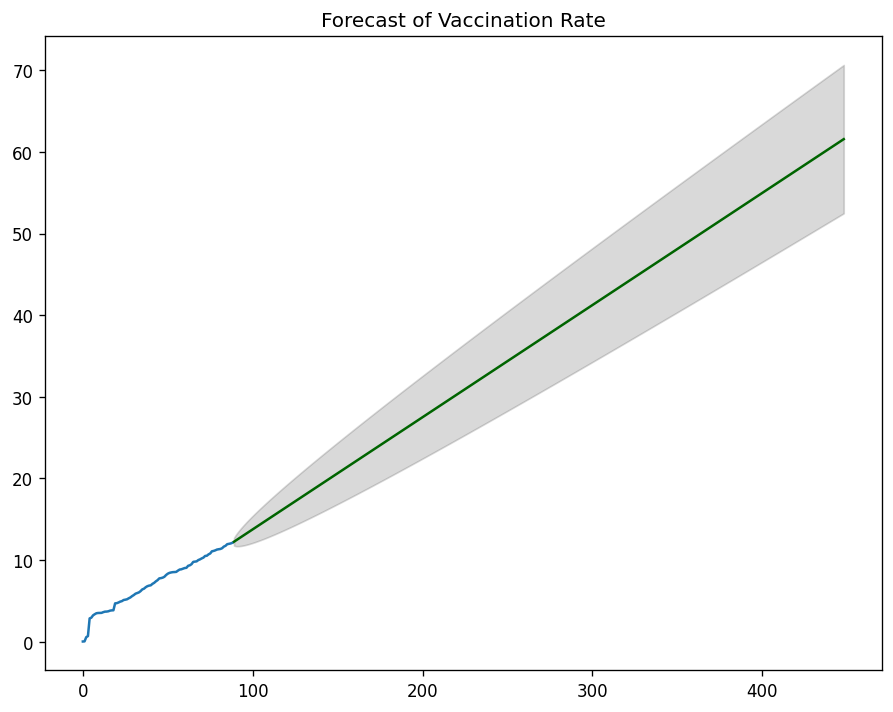

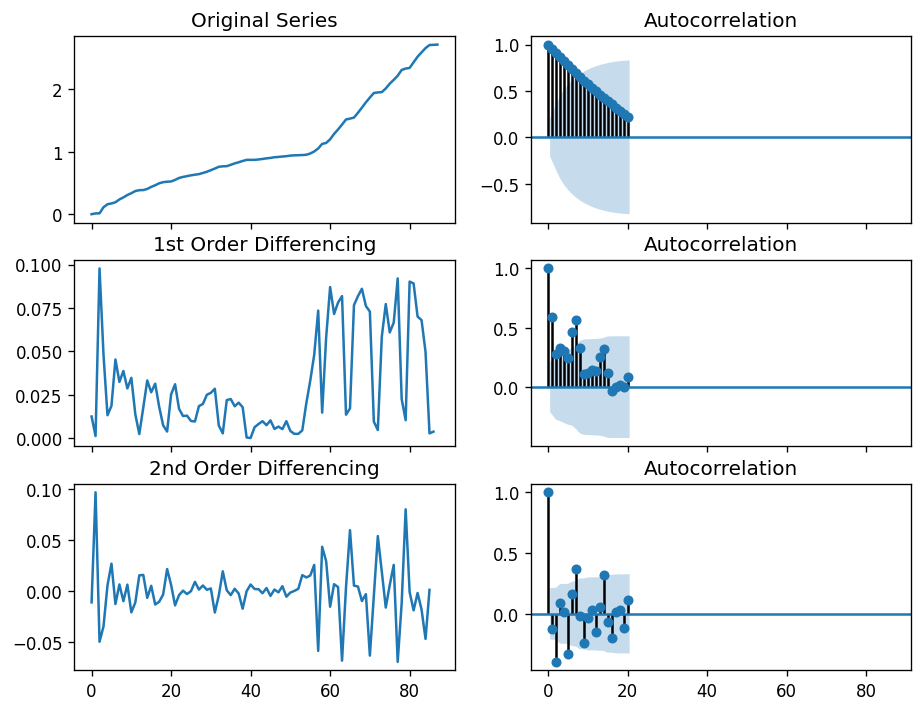

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-397.161, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-382.085, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-381.458, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-389.340, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-384.084, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-397.864, Time=0.26 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-399.852, Time=0.26 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-397.852, Time=0.45 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-395.992, Time=0.41 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-401.827, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-383.457, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-399.828, Time=0.25 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-399.836, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-398.970, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0]          

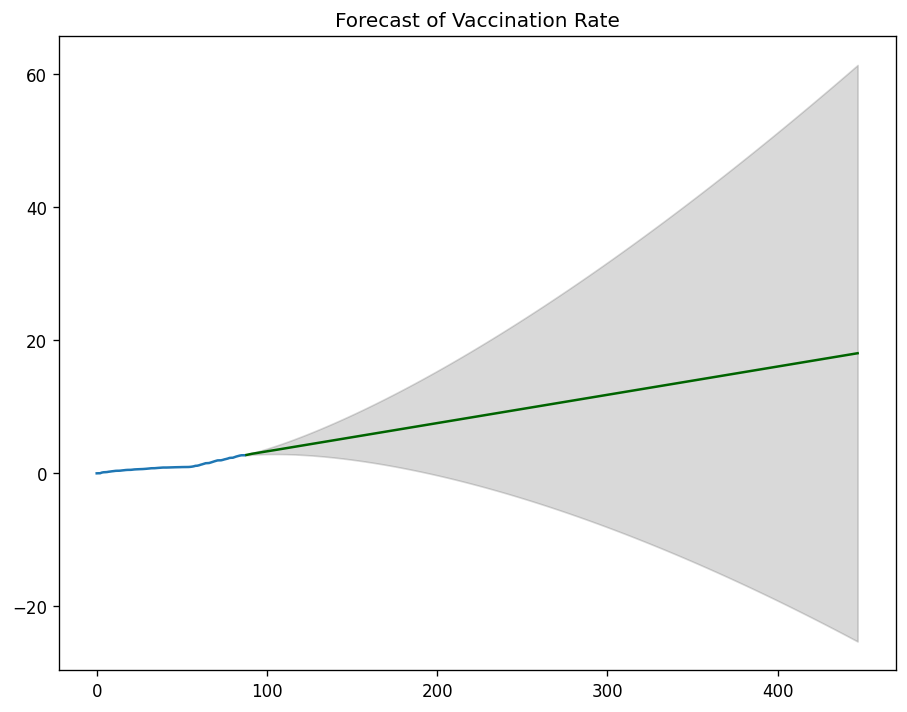

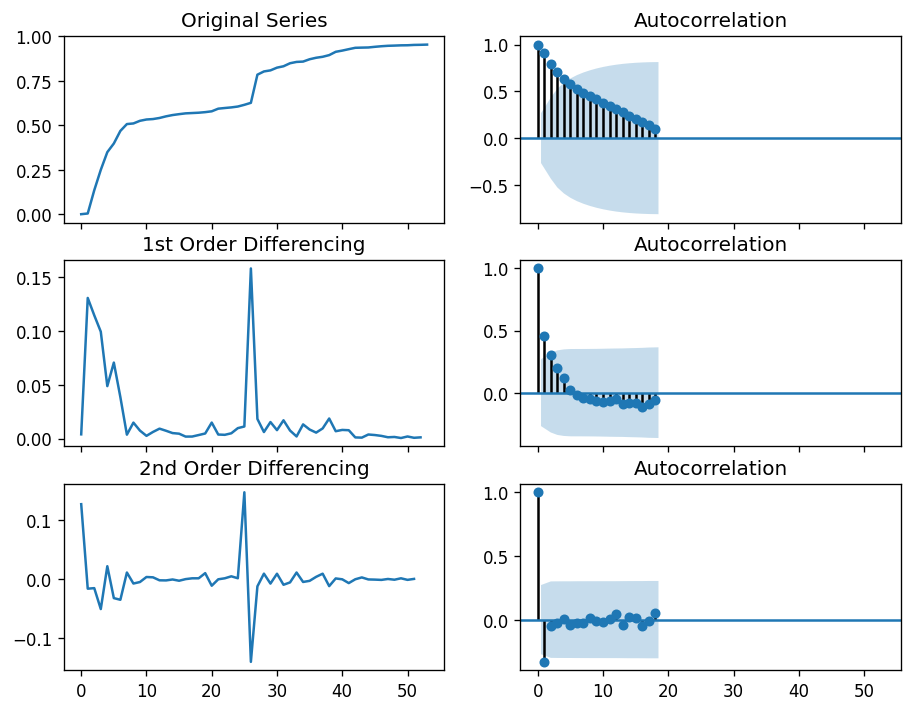

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-214.400, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-205.323, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-215.584, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-212.544, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-193.970, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-214.341, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-212.426, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-213.351, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.035 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 110.792
Date:                Tue, 08 Jun 2021   AIC                           -215.584
Time:                        14:54:0

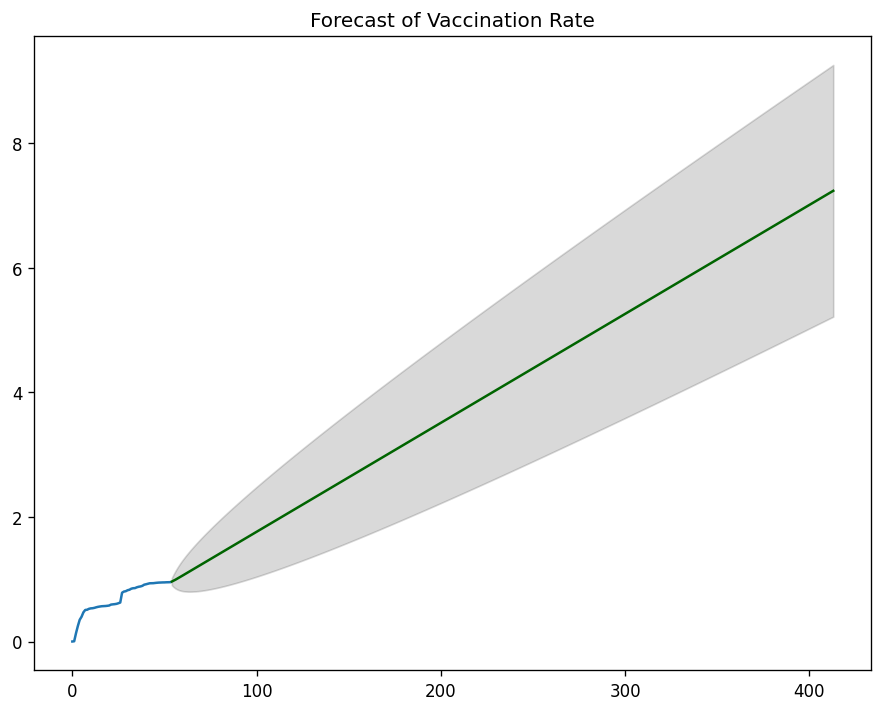

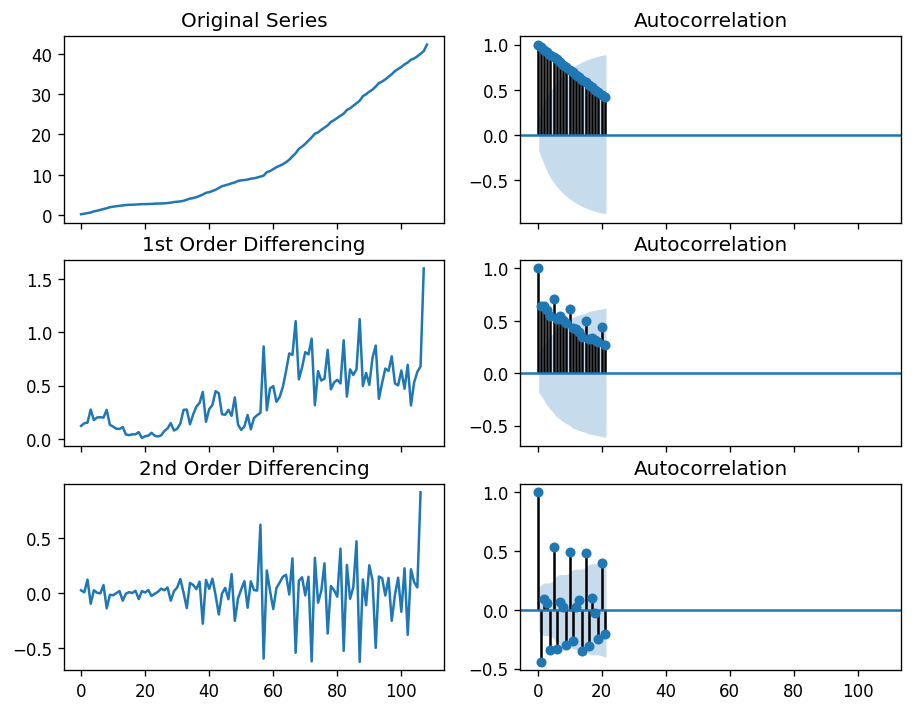

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-48.094, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-15.254, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-41.373, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-49.790, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-16.836, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-48.038, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-50.147, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-48.581, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-48.516, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-42.600, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.329 seconds
                               SARIMAX Results                                
Dep. Variable:               

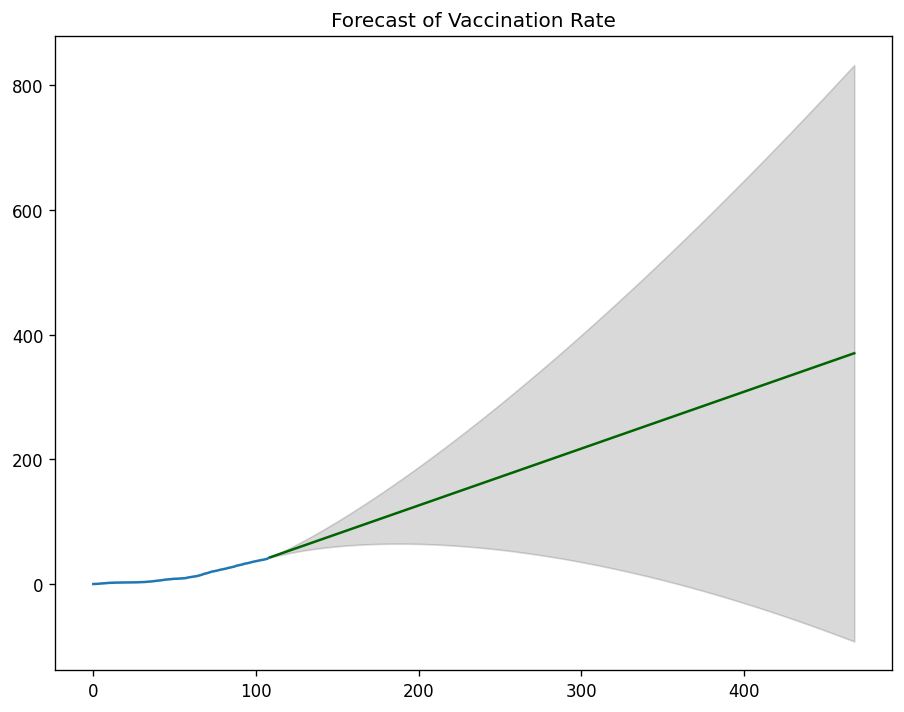

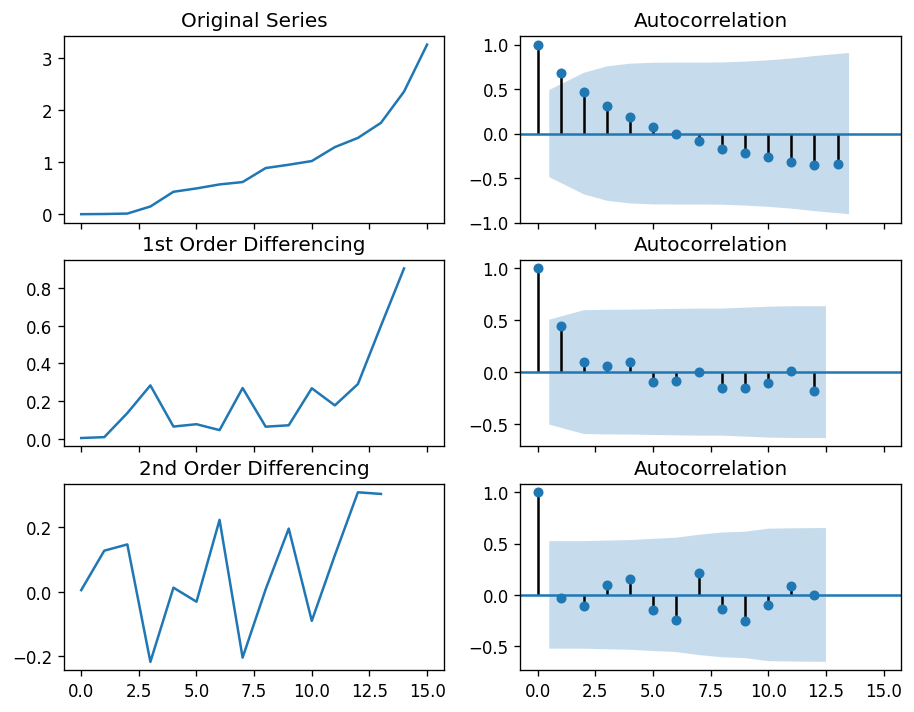

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-3.819, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-7.164, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-5.175, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-5.179, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-7.124, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.480 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 0)   Log Likelihood                   5.582
Date:                Tue, 08 Jun 2021   AIC                             -7.164
Time:                        14:54:09   BIC                             -5.886
Sample:                             0   HQIC                            -7.283
                                 - 16                                         
Covaria

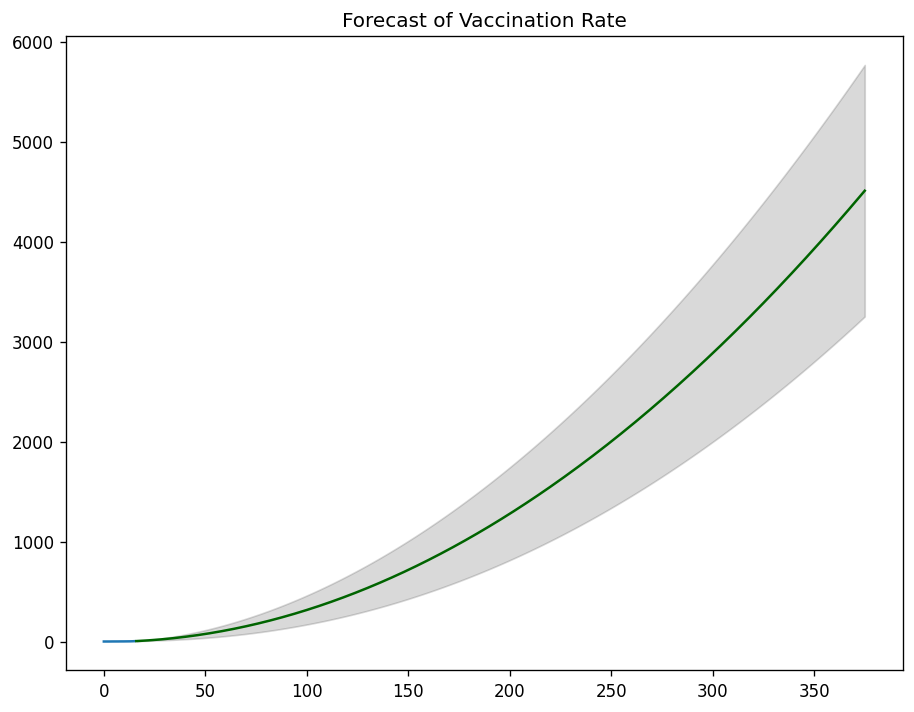

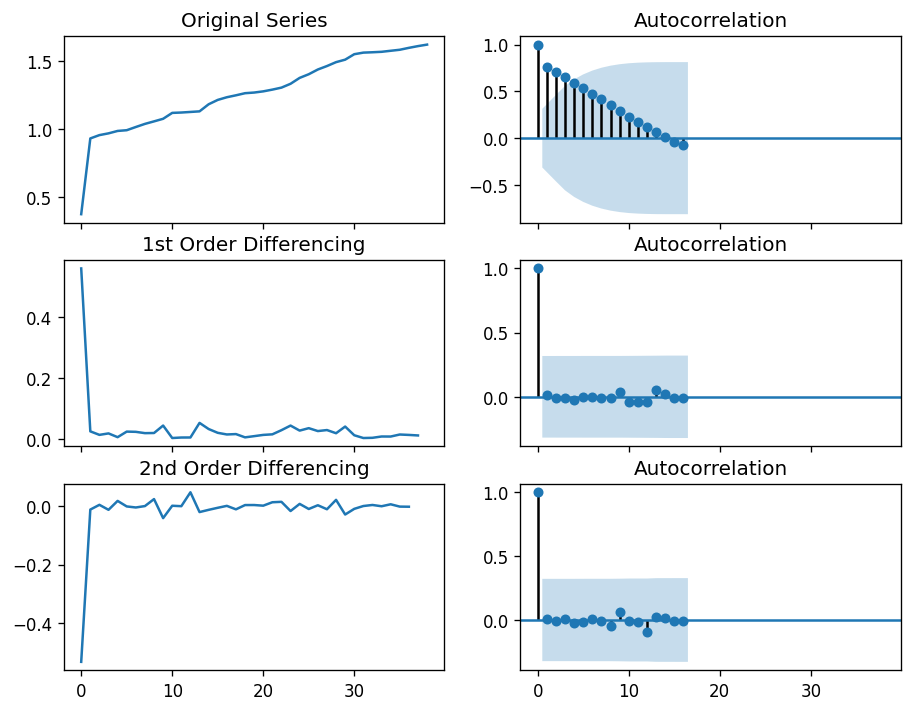

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-67.103, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-71.060, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-69.121, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-69.155, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-72.025, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.723 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   39
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  37.012
Date:                Tue, 08 Jun 2021   AIC                            -72.025
Time:                        14:54:11   BIC                            -70.414
Sample:                             0   HQIC                           -71.457
                                 - 39                                         
Co

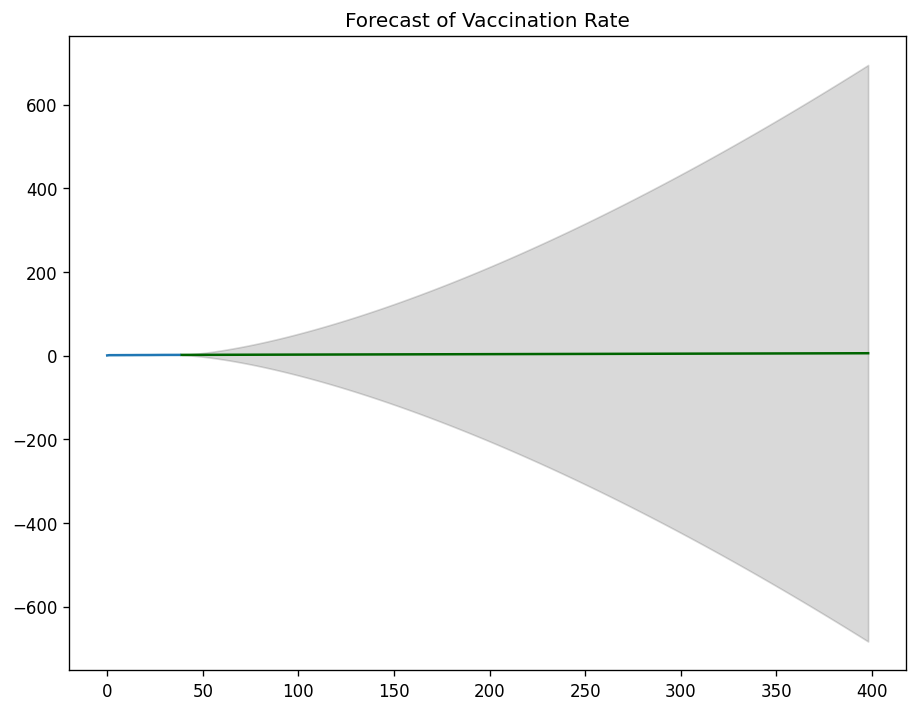

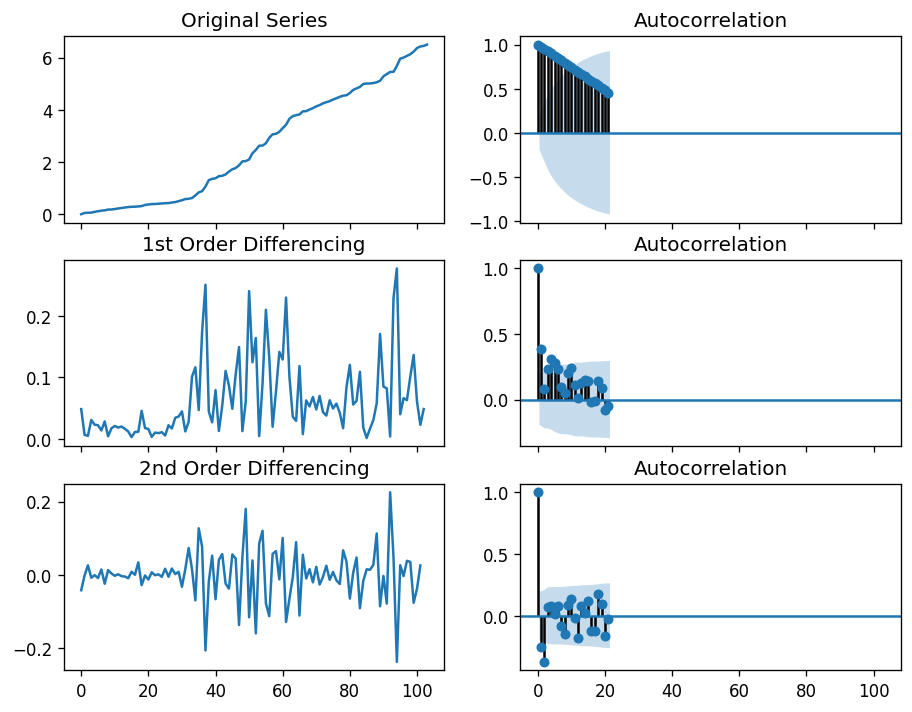

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-291.011, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-254.874, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-259.640, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-289.216, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-256.874, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-296.431, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-282.675, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-294.773, Time=0.46 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-294.731, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-292.303, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-287.688, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-292.778, Time=0.38 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-298.140, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-292.259, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]          

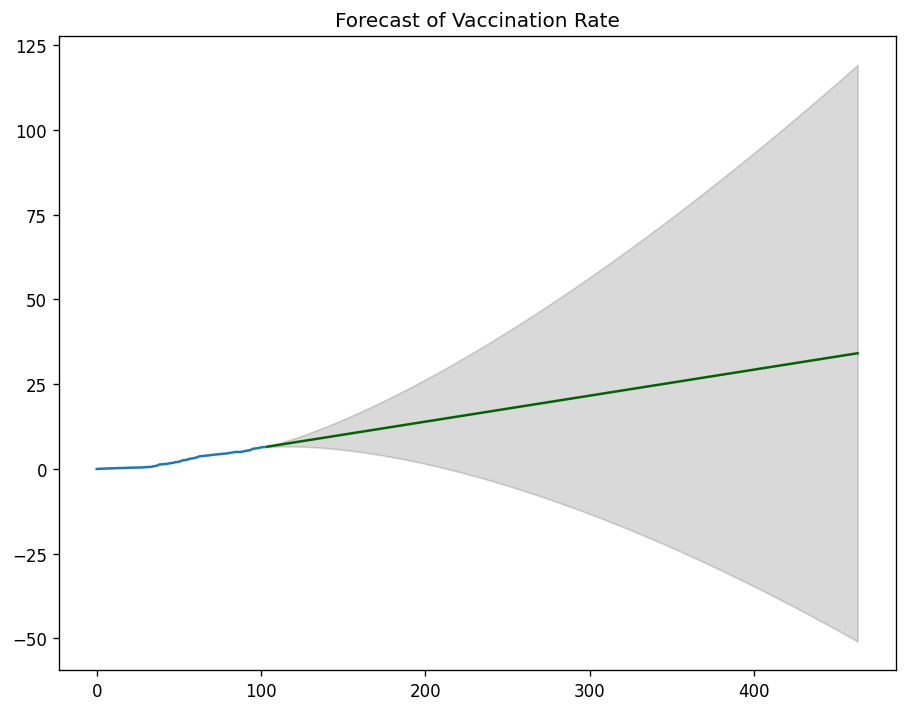

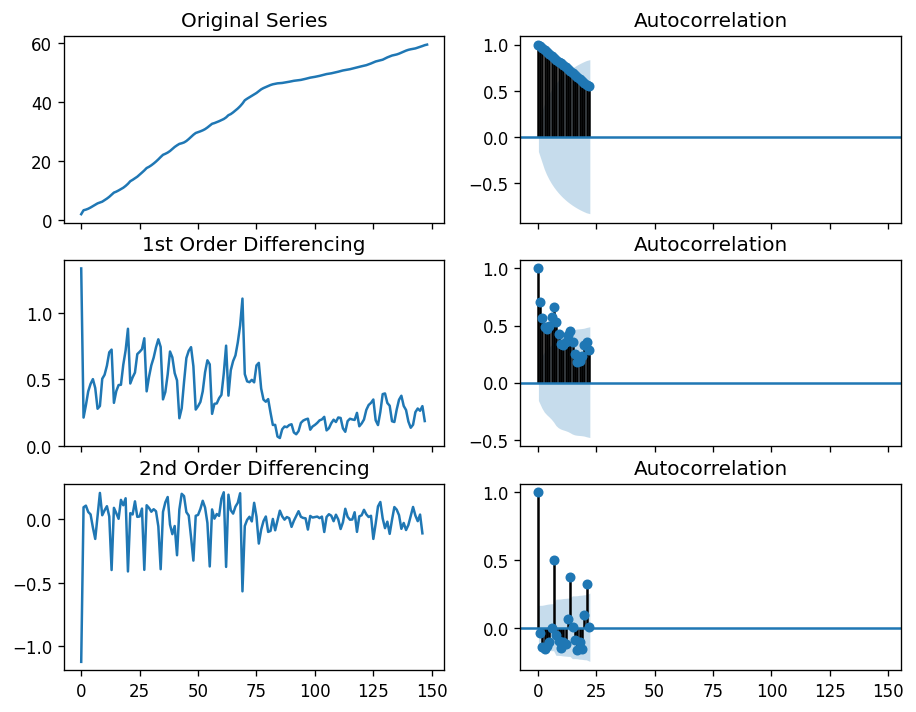

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-140.004, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-123.463, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-121.834, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-122.193, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-125.099, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-137.619, Time=0.39 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-138.471, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-124.412, Time=0.18 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-138.702, Time=0.13 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 2.889 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  149
Model:

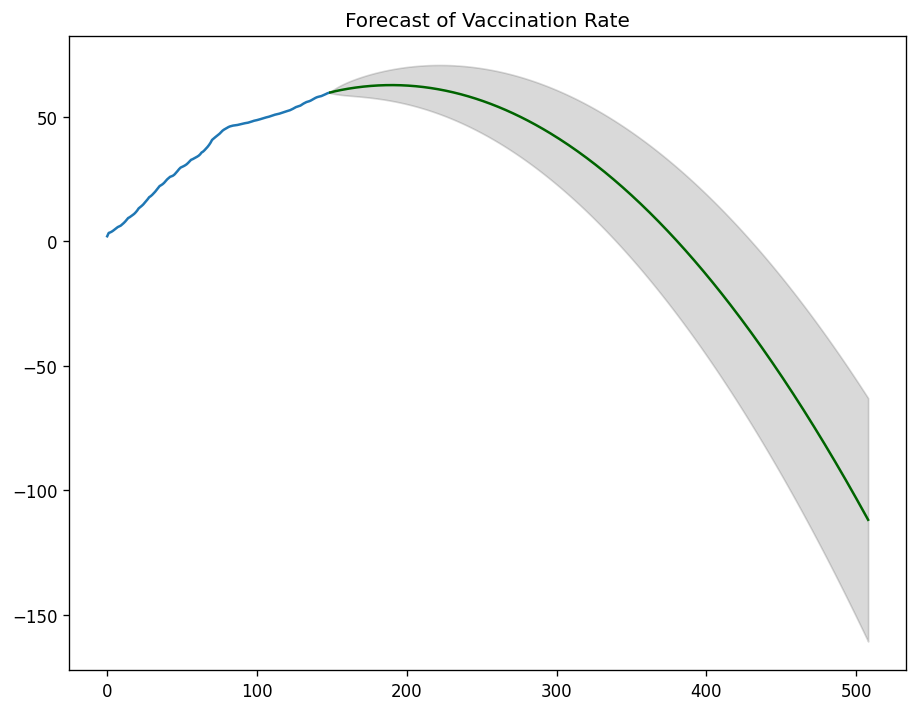

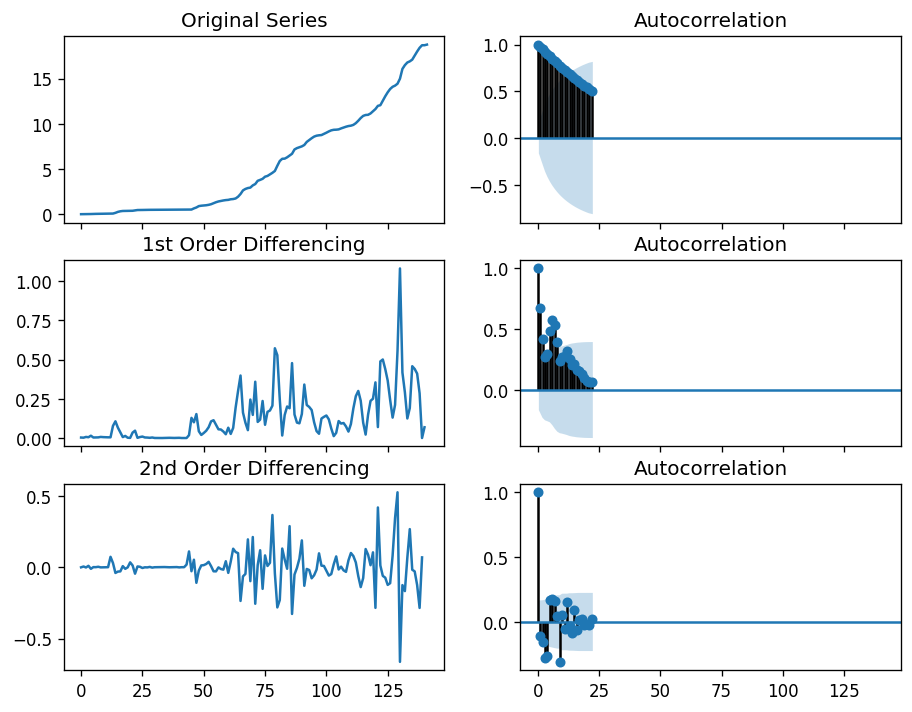

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-169.961, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-169.556, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-170.919, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-171.959, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.601 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  142
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  86.980
Date:                Tue, 08 Jun 2021   AIC                           -171.959
Time:                        14:54:23   BIC                           -169.018
Sample:                             0   HQIC                          -170.764
                                - 142                                         
Co

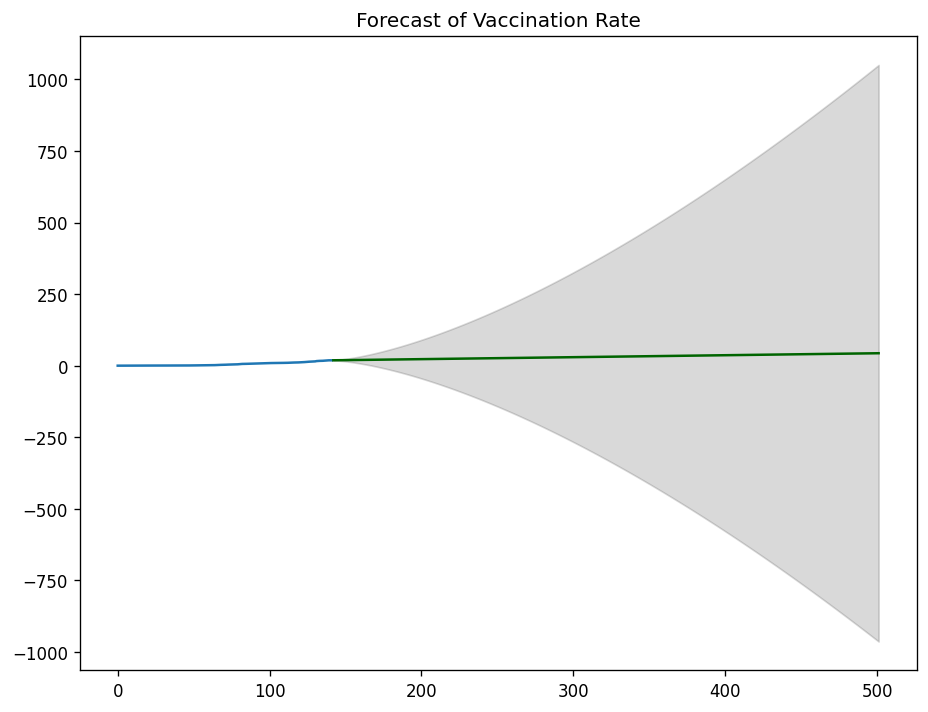

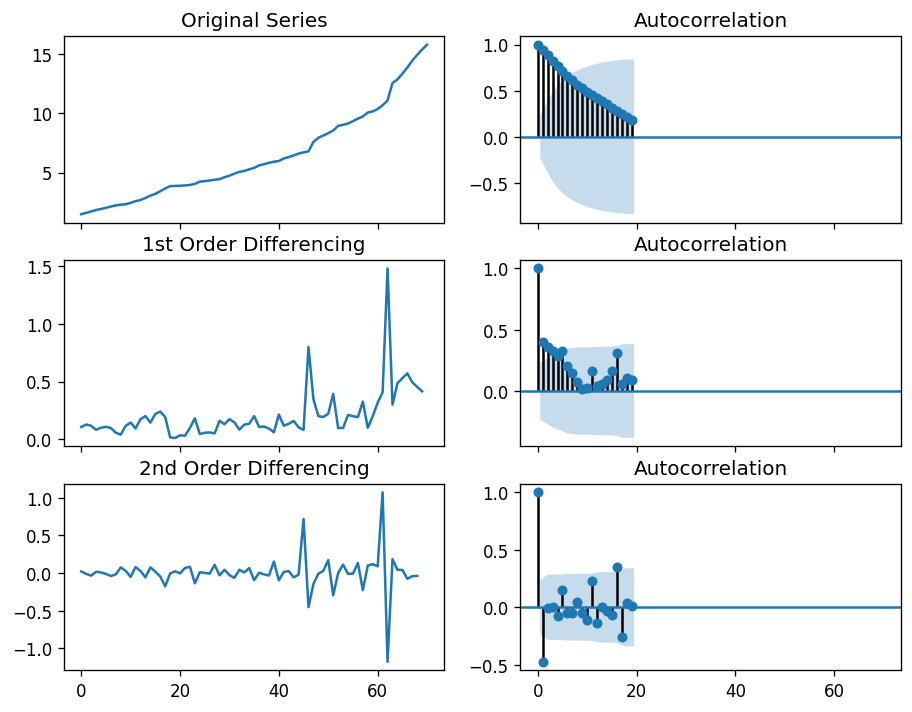

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-31.255, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1.532, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-16.911, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-32.951, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-3.506, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-31.226, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-29.140, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-32.956, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-31.024, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-31.022, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-18.837, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-29.145, Time=0.20 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.147 seconds
                               SARIMAX Results                                
Dep. Variable:         

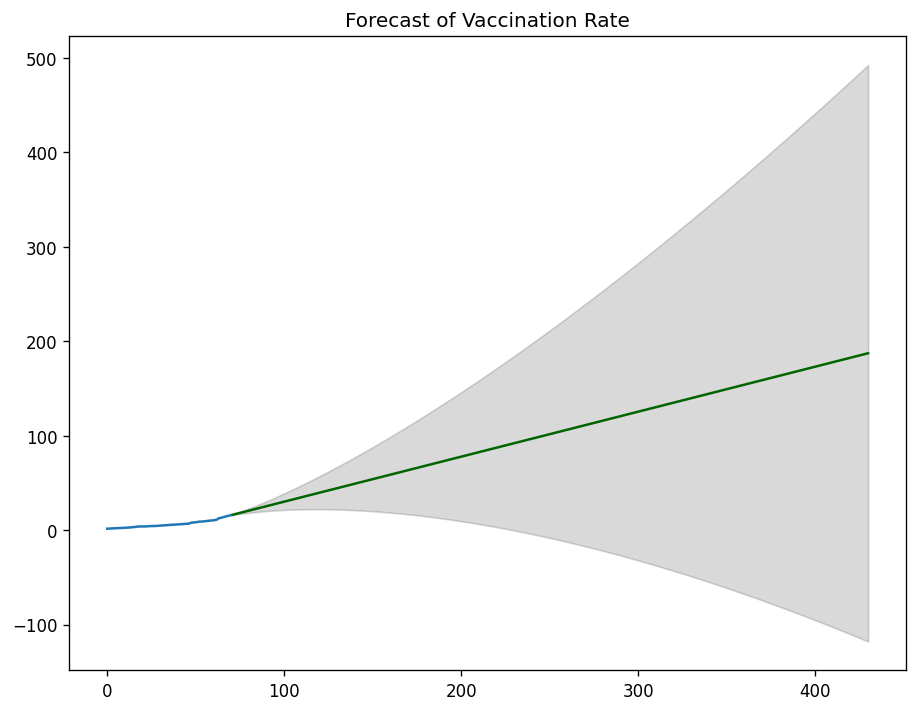

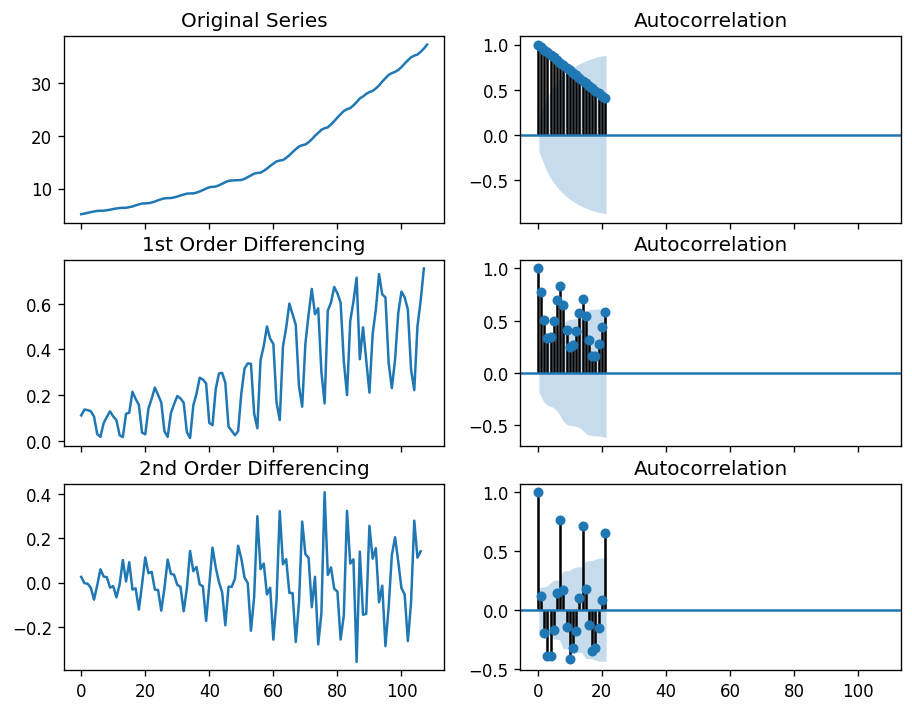

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-132.874, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24.878, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-128.324, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-103.773, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=91.067, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-131.322, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-140.371, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-127.915, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-130.534, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-146.315, Time=0.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-144.202, Time=0.52 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-146.347, Time=0.50 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-141.011, Time=0.34 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC

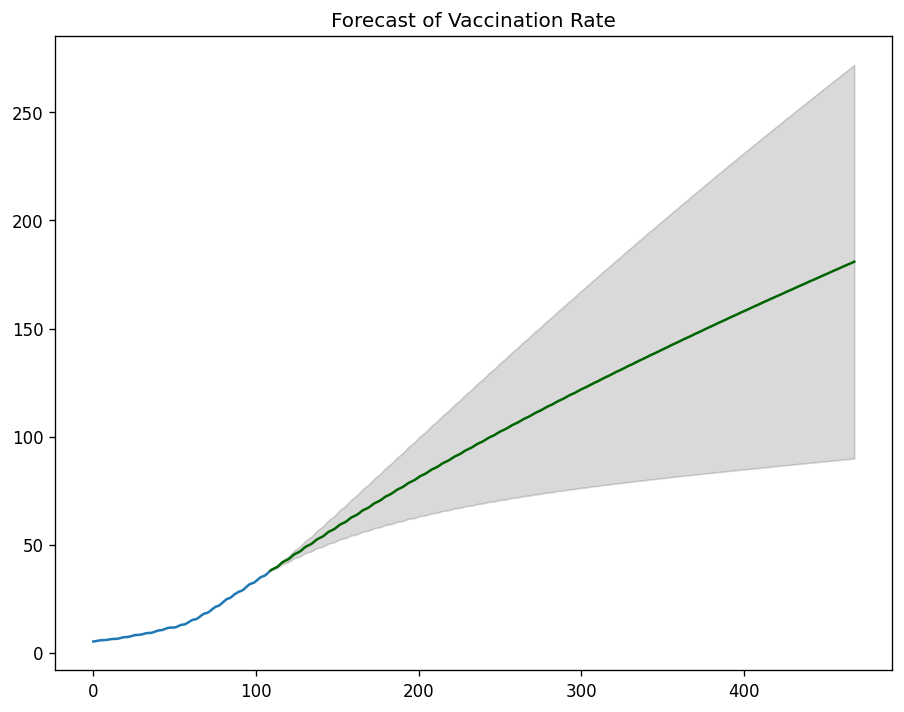

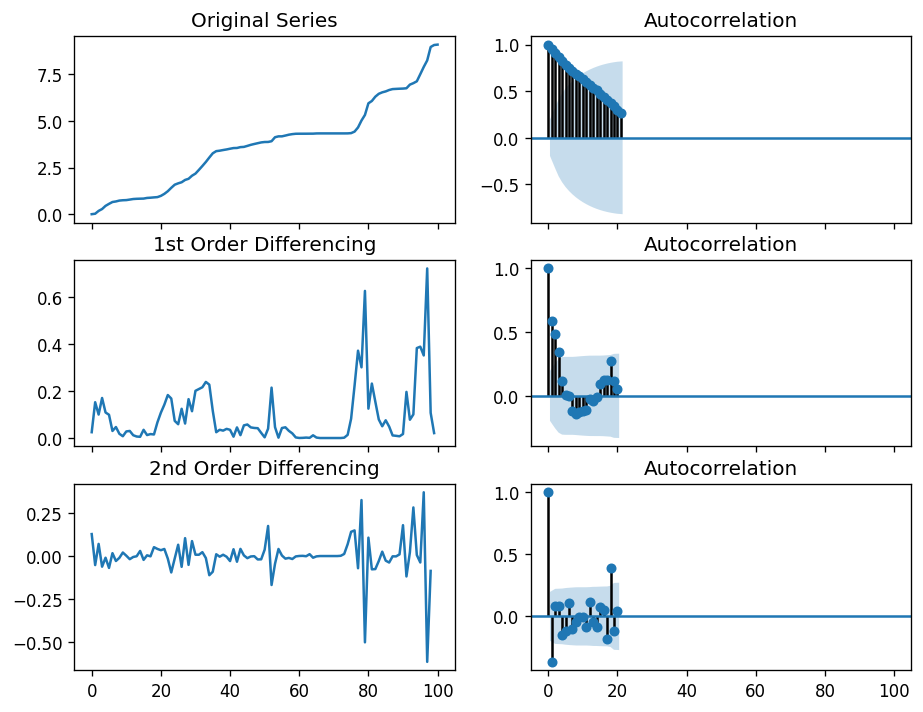

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-171.366, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-129.345, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-170.171, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-153.724, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-88.401, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-170.683, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-176.859, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-163.949, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-179.464, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-180.098, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-173.270, Time=0.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-179.851, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-177.728, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-179.038, Time=0.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept 

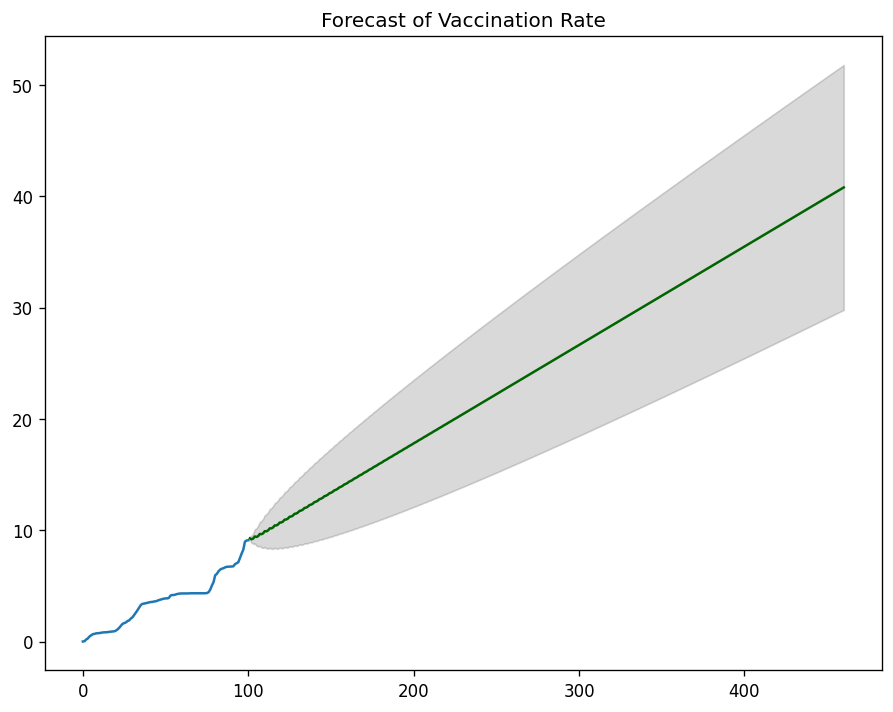

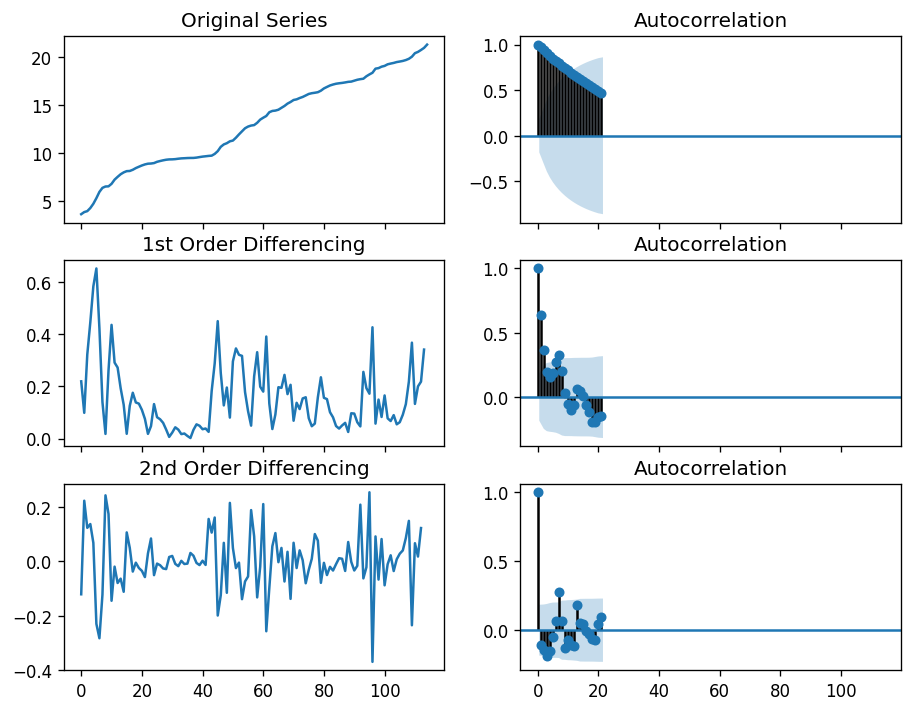

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-180.224, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-179.517, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-180.341, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-182.213, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.579 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  92.106
Date:                Tue, 08 Jun 2021   AIC                           -182.213
Time:                        14:54:45   BIC                           -179.485
Sample:                             0   HQIC                          -181.106
                                - 115                                         
Co

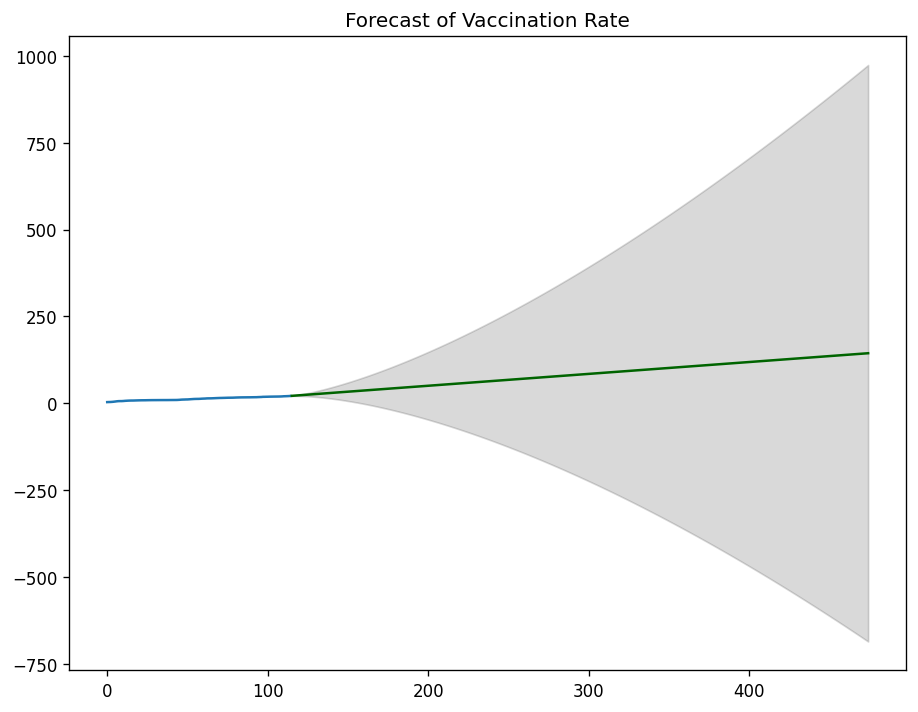

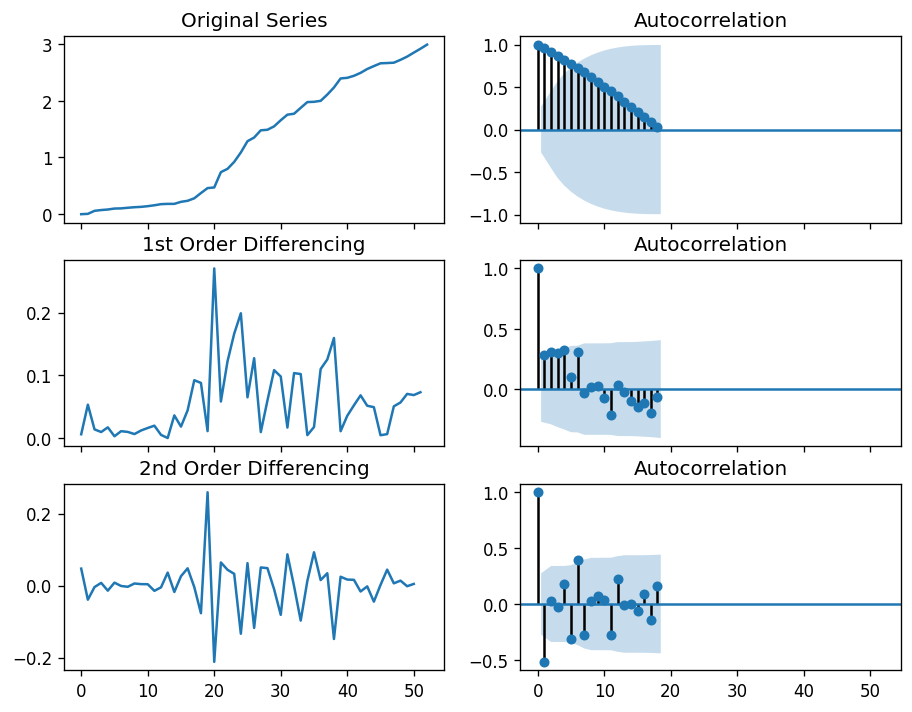

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-146.417, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-125.394, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-139.191, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-148.046, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-127.375, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-146.489, Time=0.27 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-144.333, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-149.861, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-148.263, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-148.345, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-141.158, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-146.169, Time=0.13 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.263 seconds
                               SARIMAX Results                                
Dep. Vari

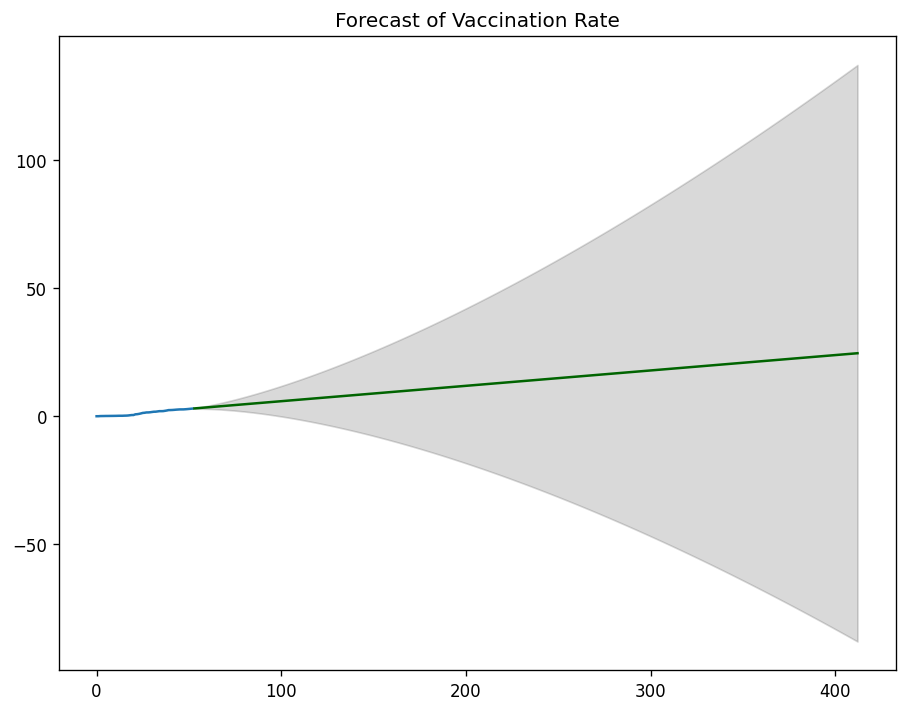

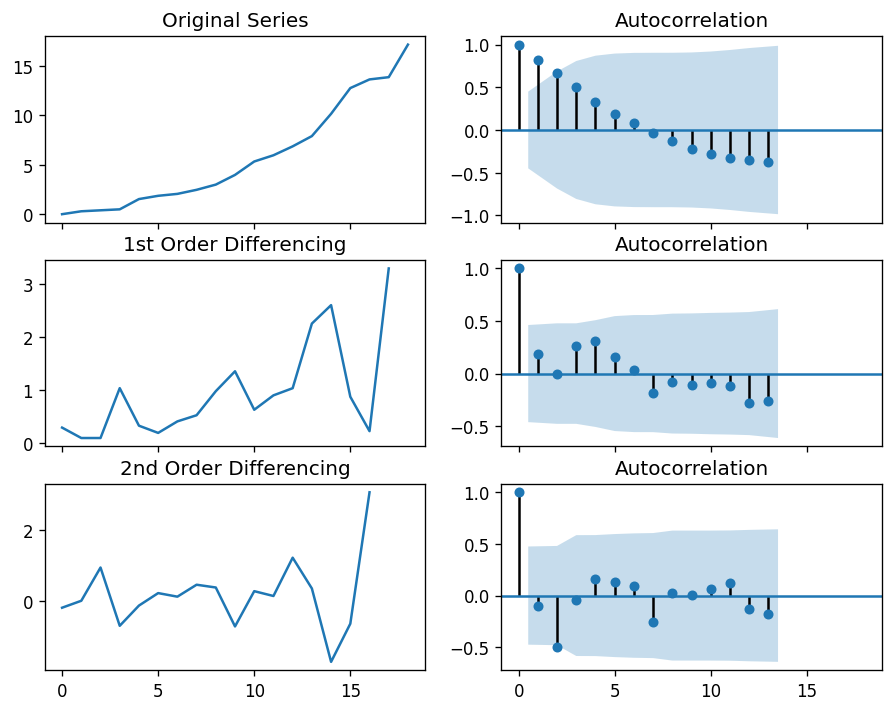

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=51.533, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=53.166, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=50.075, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.365 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -24.038
Date:                Tue, 08 Jun 2021   AIC                             50.075
Time:                        14:54:50   BIC                             50.908
Sample:                             0   HQIC                            50.158
                                 - 19                                         
Covariance Ty

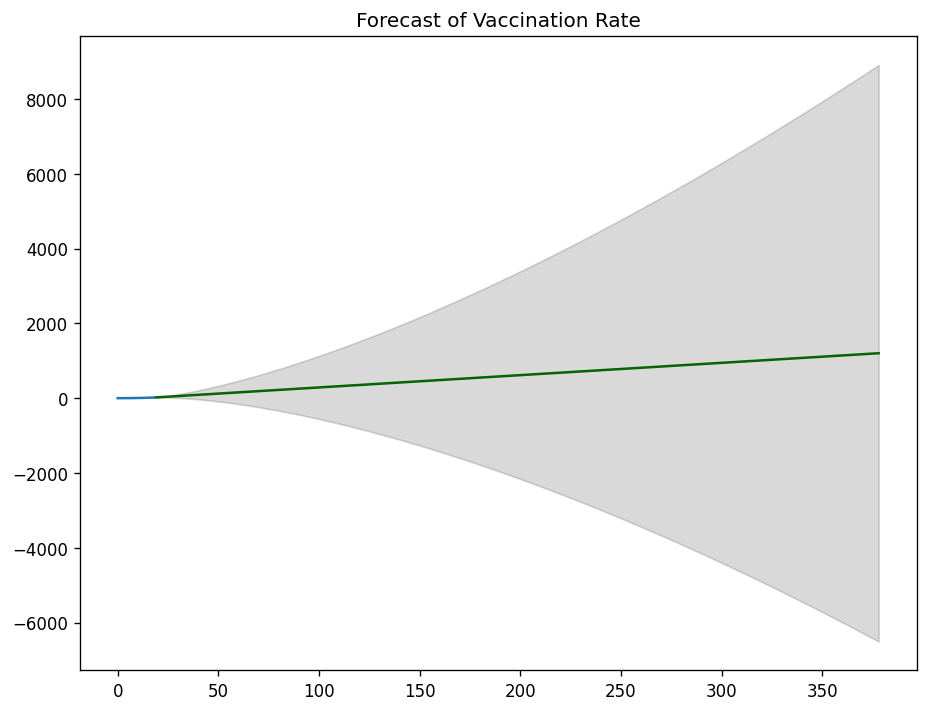

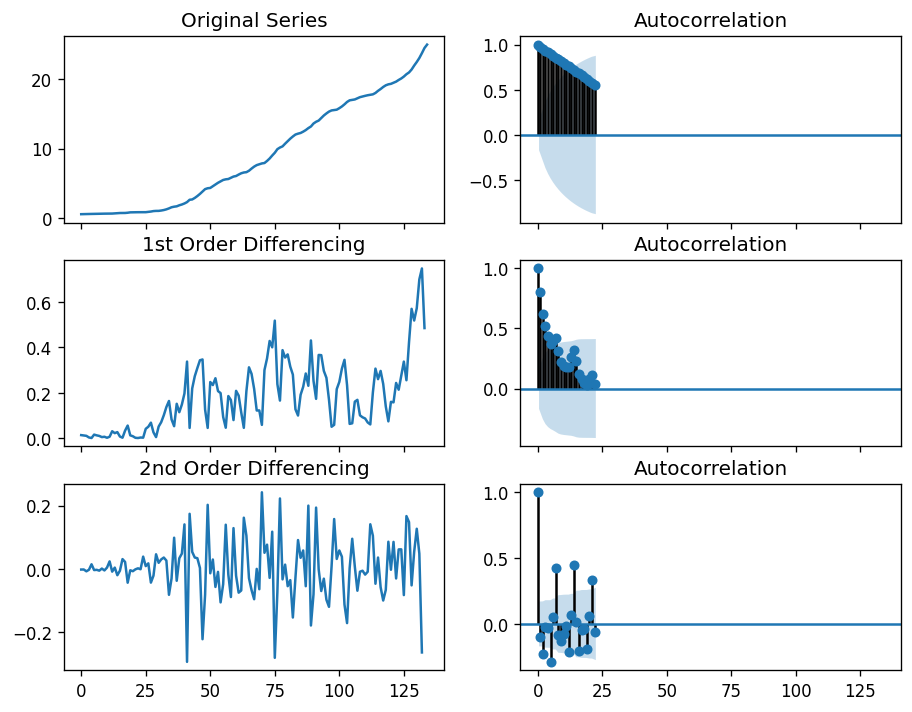

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-254.267, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-253.644, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-255.197, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-256.068, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.684 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  135
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 129.034
Date:                Tue, 08 Jun 2021   AIC                           -256.068
Time:                        14:54:52   BIC                           -253.177
Sample:                             0   HQIC                          -254.893
                                - 135                                         
Co

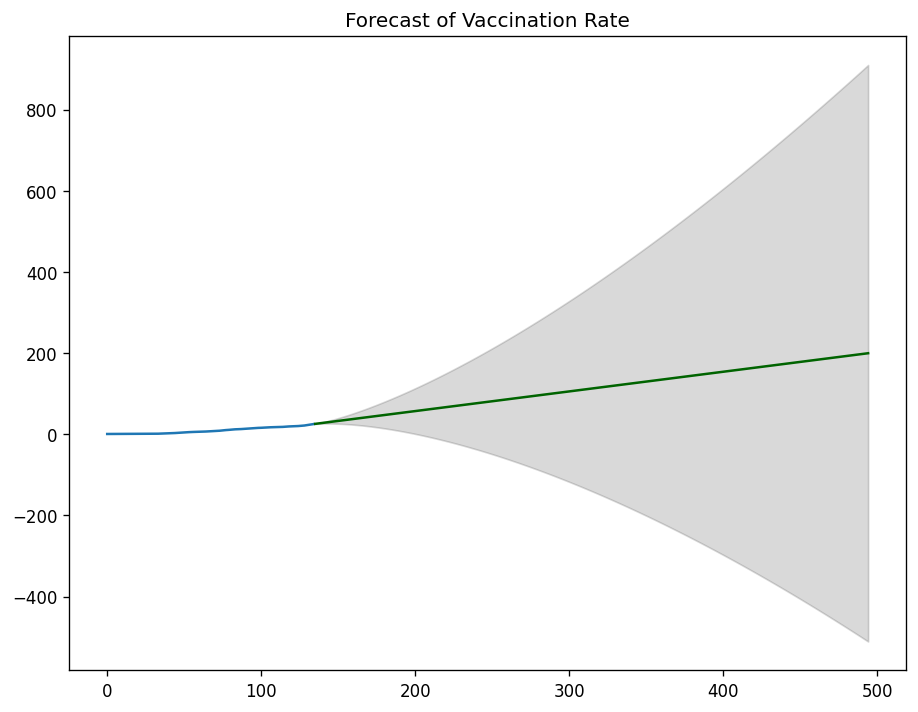

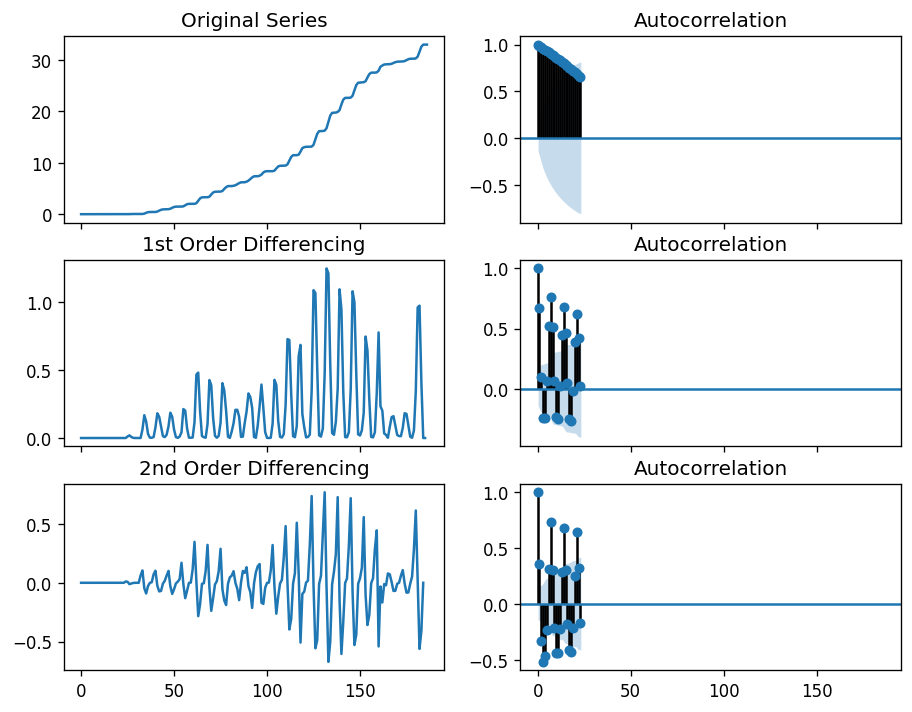

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-77.777, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-25.088, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-48.162, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-79.159, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-27.088, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-115.978, Time=0.28 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-134.262, Time=0.40 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-203.231, Time=0.52 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-180.310, Time=0.33 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-181.350, Time=0.72 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-203.502, Time=0.69 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-209.669, Time=0.72 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(3,2,4)(0,0,0)[0] intercept   : AIC=-224.0

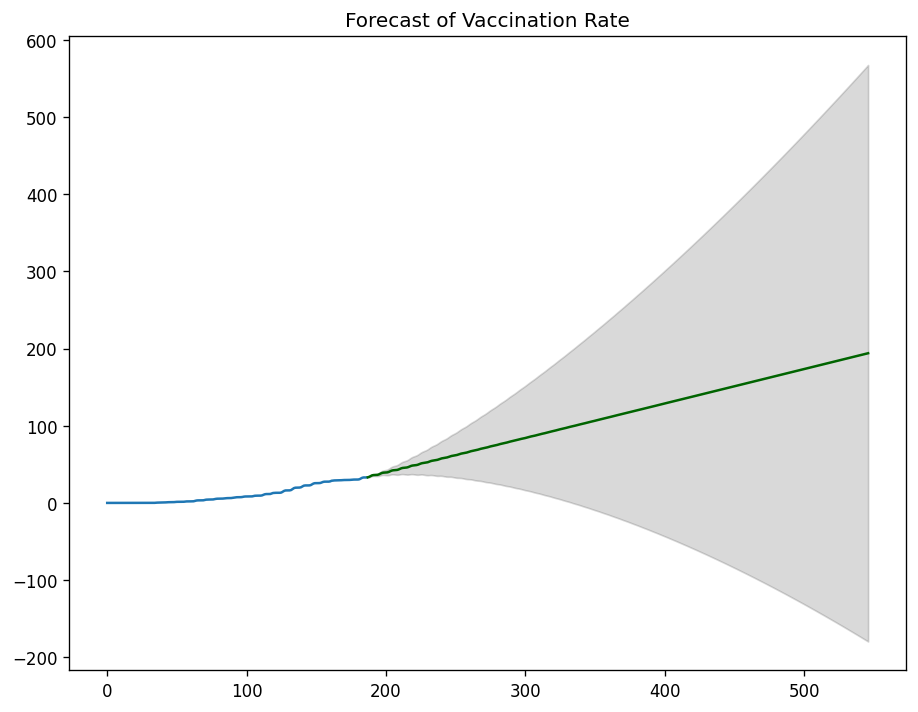

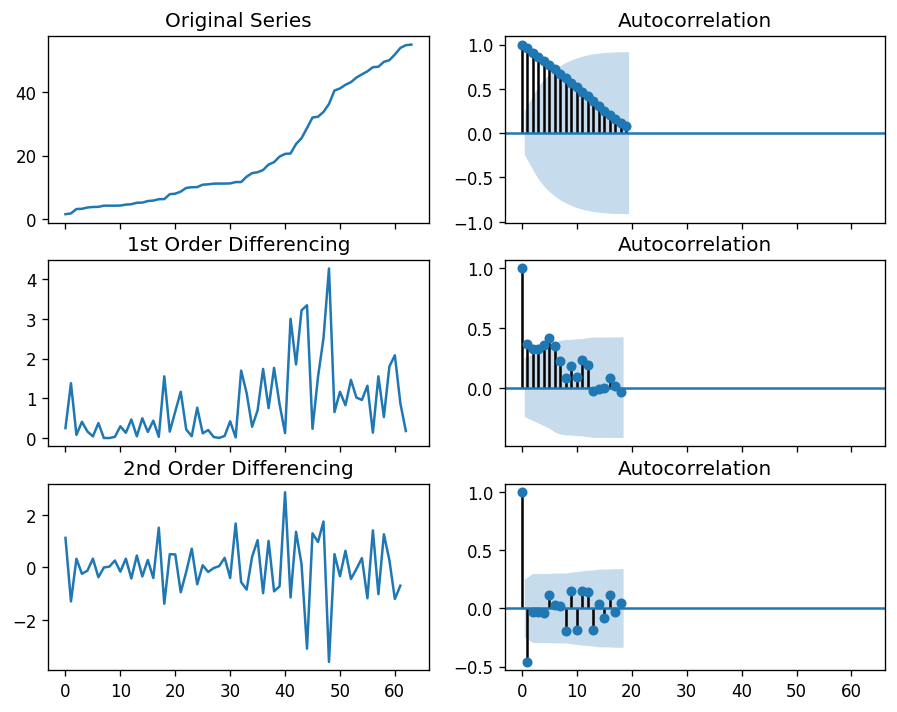

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=161.204, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=186.529, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=173.659, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=159.218, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=184.529, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=161.200, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=162.726, Time=0.33 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=157.425, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=159.394, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=159.384, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=171.661, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=160.786, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.141 seconds
                               SARIMAX Results                                
Dep. Variable:       

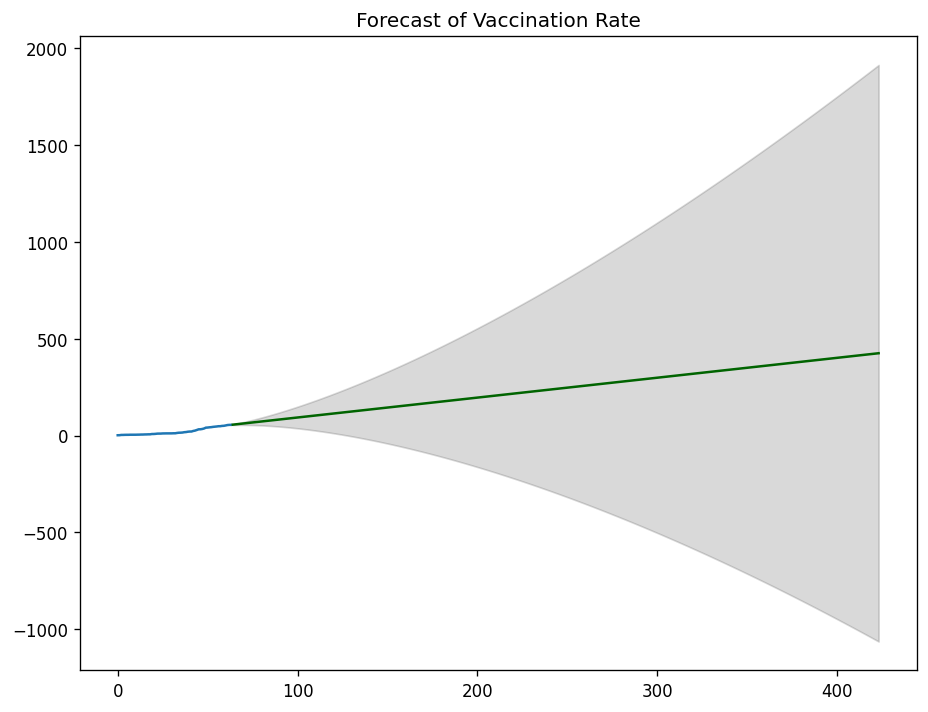

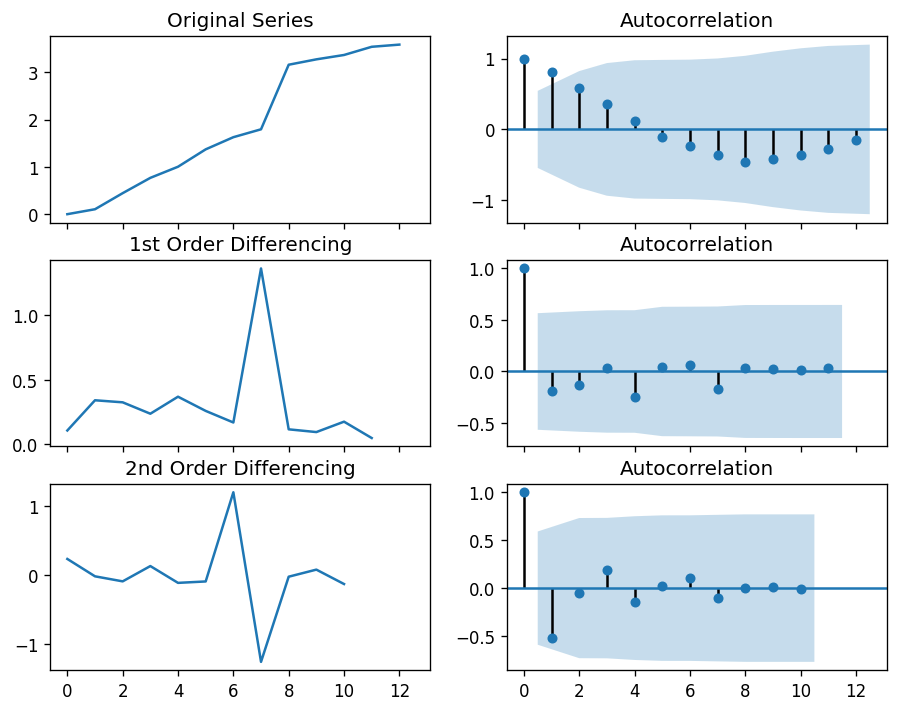

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21.369, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20.165, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=19.370, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.416 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -8.685
Date:                Tue, 08 Jun 2021   AIC                             19.370
Time:                        14:55:09   BIC                             19.768
Sample:                             0   HQIC                            19.119
                                 - 13                                         
Covariance Ty

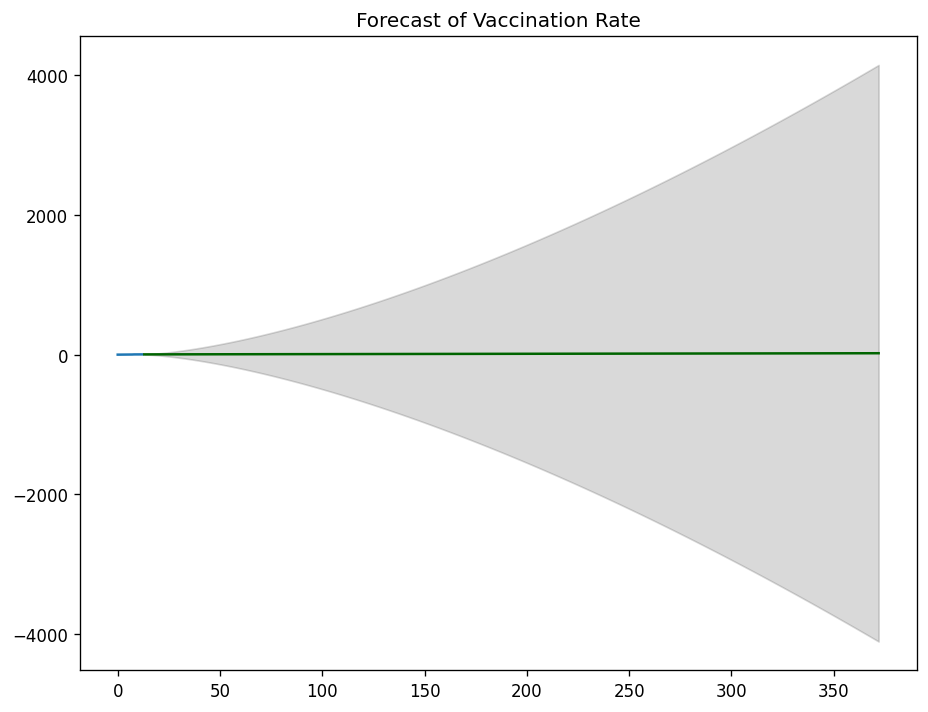

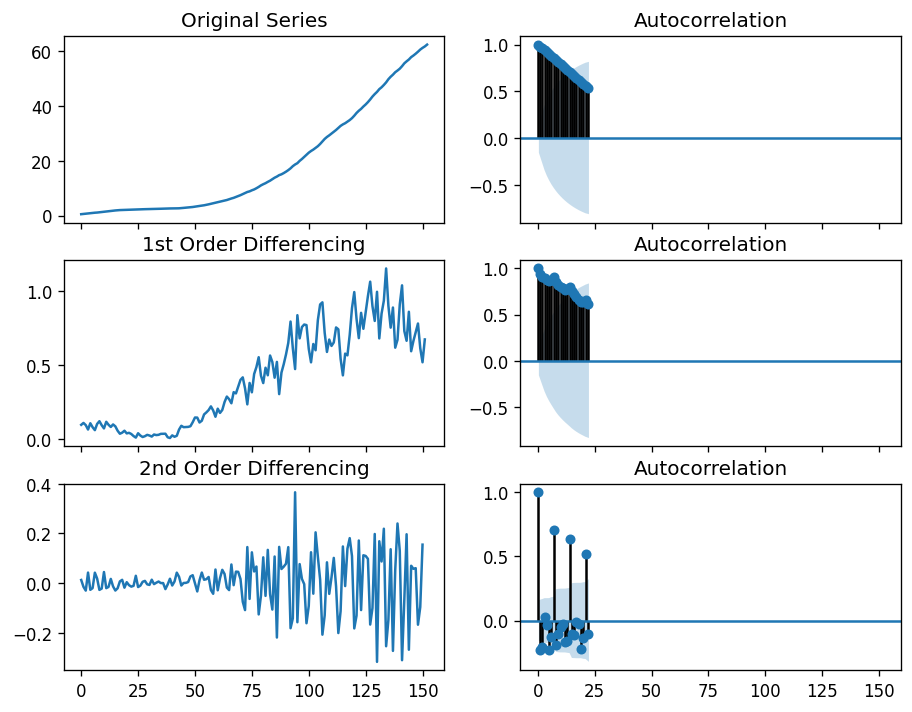

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-267.211, Time=0.30 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-239.974, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-246.347, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-258.639, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-241.783, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-267.536, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-256.466, Time=0.35 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-265.582, Time=0.43 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-271.374, Time=0.56 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-267.505, Time=0.32 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-269.352, Time=0.61 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-271.090, Time=0.55 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-293.996, Time=0.70 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept   : 

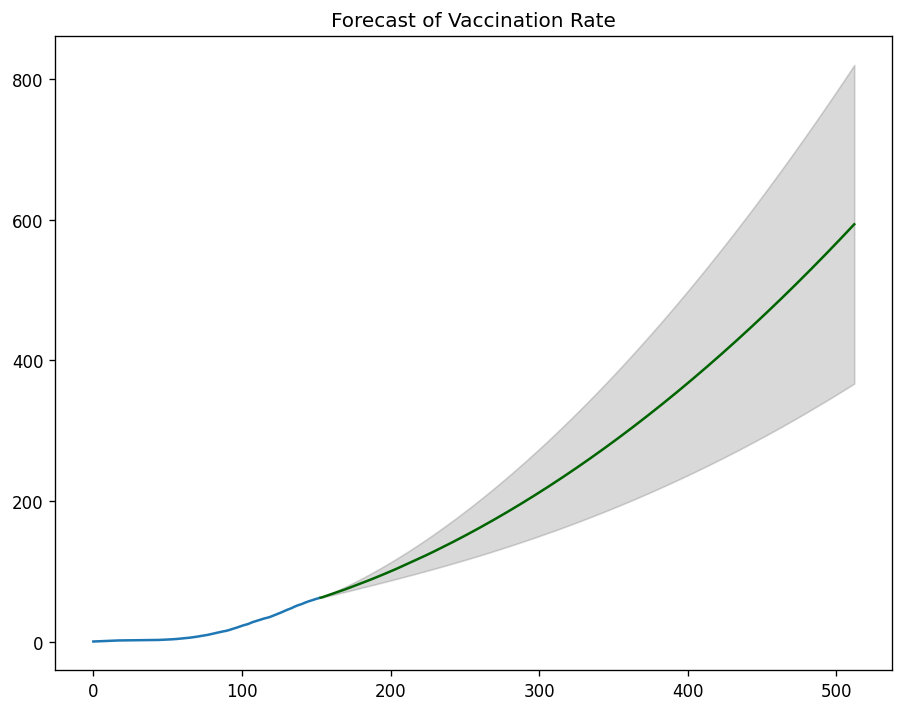

In [10]:
import math
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
country_list = ['PYF', 'AUS', 'EGY', 'USA', 'BRA', 'DEU', 'DNK', 'ZAF', 'RUS', 'GTM',
                'NGA', 'ESP', 'IRN', 'ETH', 'IDN', 'GBR', 'MEX', 'COL', 'CHE', 'LKA', 'TUR', 'NAM',
                'JOR', 'ARG', 'NOR', 'ISL', 'UZB', 'CAN']


#create one big dataframe within the for loop
big_data= pd.DataFrame()       
                       
for country in country_list:
  pcv = pcv.sort_values('location')
  pcv['eid'] = (pcv.groupby(['location']).cumcount()==0).astype(int)
  pcv['eid'] = pcv['eid'].cumsum()
  pcvdf=pcv[pcv.iso_code==country]

  #check dataframe of country
  fpcvdf = pcvdf.sort_values('people_vaccinated')
  pcvval = fpcvdf['people_vaccinated'].values * 100 /list(pcvdf.population)[0]

  for i in range(len(pcvval)):
    if pcvval[i]>=0:
      pass
    else :
      end = i
      break

  pcvval = pcvval[:end]
  d = list(fpcvdf.date)[:end]
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(pcvval); axes[0, 0].set_title('Original Series')
  plot_acf(pcvval, ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(np.diff(pcvval)); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(np.diff(pcvval), ax=axes[1, 1])
  dpcvval = np.diff(pcvval)

  # 2nd Differencing
  axes[2, 0].plot(np.diff(dpcvval)); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(np.diff(dpcvval), ax=axes[2, 1])
  plt.show()

  #arima model parameters
  model = pm.auto_arima(pcvval, start_p=1, start_q=1,
  test='adf', # use adftest to find optimal 'd'
  max_p=4, max_q=4, # maximum p and q
  m=1, # frequency of series
  d=None, # let model determine 'd'
  seasonal=False, # No Seasonality
  start_P=0,
  D=0,
  trace=True,
  error_action='ignore',
  suppress_warnings=True,
  stepwise=True)
  print(model.summary())
  # model.plot_diagnostics(figsize=(7,5))
  plt.show()
  n_periods = 12*30
  fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
  index_of_fc = np.arange(len(pcvval), len(pcvval)+n_periods)

  # make series for plotting purpose
  fc_series = pd.Series(fc, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)
  # Plot
  plt.plot(pcvval)
  plt.plot(fc_series, color='darkgreen')
  plt.fill_between(lower_series.index,
  lower_series,
  upper_series,
  color='k', alpha=.15)
  plt.title("Forecast of Vaccination Rate")
  plt.show()

  for i in range(n_periods):
    date = parse(d[-1]) + datetime.timedelta(days=1)
    d.append(str(date).split()[0])

  #calculates the lag
  vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  fully_vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_fully_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  mseMin = math.inf
  lagMin=0

  for lag in range(0,139):
    vacNew = vaccinated[:len(vaccinated)-lag]
    fullVacNew = fully_vaccinated[lag:]
    mse = 0
    if len(fullVacNew)> 0:
      for i in range(len(fullVacNew)):
        mse += (vacNew[i] - fullVacNew[i])**2
        mse = mse/len(vacNew)
      if mse < mseMin:
        lagMin = lag
        mseMin = mse
    else:
      pass
 
  y = list(pcvval) + list(fc)

  dfp = pd.DataFrame()
  dfp['date'] = d
  dfp["date"] = pd.to_datetime(dfp["date"]) #convert string into datetime object
  dfp["date_adjusted"] =  dfp["date"] + datetime.timedelta(days=lagMin) #add lag factor
  dfp['people_fully_vaccinated'] = y
  dfp['location']= country
  big_data= pd.concat([big_data, dfp], axis=0, sort=False, ignore_index=True)

big_data.to_csv(f'world_data_forecast.csv', index= False)

  